<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CUSTOSMER-CHURN PREDICTION**
Churn prediction helps identify customers who are likely to stop using a service or cancel their subscription. This is important because keeping current customers is usually cheaper than finding new ones. Once you know who might leave, you can take specific actions to encourage them to stay. Every time a client leaves, it represents a significant investment lost.
In the **Telecom industry**, customers can easily switch between different service providers, leading to intense competition. As a result, the industry faces an average annual churn rate of *15-25%*. Since acquiring a new customer is 5-10 times more expensive than retaining an existing one, customer retention has become a higher priority than customer acquisition.
To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**.

**Business Problem** : Developing a predictive model to identify telecom customers who are at a high risk of churn using synthetically generated customer data.

The data set consists of 21 Variables and 7043 Observations.

**CustomerId** : Customer Id

**Gender** : Gender

**SeniorCitizen** : Whether the customer is a senior citizen (1, 0)

**Partner** : Whether the client has a partner (Yes, No), Married or not. Living together, being roommates.

**Dependents** : Whether the client has dependents (Yes, No) (Child, mother, father, grandmother)

**tenure** : Number of months the customer stays with the company
PhoneService : Whether the customer has phone service (Yes, No).

**MultipleLines** : Whether the customer has more than one line (Yes, No, No phone service)

**InternetService** : Customer's internet service provider (DSL, Fiber optic, No)

**OnlineSecurity** : Whether the customer has online security (Yes, No, No Internet service)

**OnlineBackup** : Whether the customer has online backup (Yes, No, No Internet service)

**DeviceProtection** : Whether the customer has device protection (Yes, No, No Internet service)

**TechSupport** : Whether the customer receives technical support (Yes, No, No Internet service)


Understanding the Data

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [118]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [119]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [122]:
#Reducing number of rows to 5000
import pandas as pd

df = df.sample(n=5000, random_state=42)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

In [123]:
df['Churn'].value_counts()

,count
Churn,
No,3646
Yes,1354


**Adding Data Constraints:**


*   Data Quality: Introduce specific data quality issues like missing values, outliers, or inconsistencies.
*   Data Volume: Reduce the dataset size to simulate real-world constraints


* Feature Limitations: Restrict the number of features that can be used in the model.






In [124]:
import numpy as np
#Introducing Missing values
df['TotalCharges'].iloc[np.random.choice(df.index, size=2, replace=False)] = np.nan   #Introducing random missing values
df.loc[df['PhoneService'] == 'No', 'tenure'] = np.nan    #Introducing systematic missing values,i.e removing 'tenure' values only for customers who have 'PhoneService' set to 'No'.

In [125]:
#Introducing outliers
df.loc[np.random.choice(df.index, size=3, replace=False), ['tenure', 'MonthlyCharges']] = [1, df['MonthlyCharges'].max() * 3]
#Multivariate Outliers: These are data points where the combination of two or more feature values is extreme or highly unlikely. For example, in your dataset, a customer with a very low tenure (e.g., 1 month) but extremely high MonthlyCharges (e.g., three times the maximum) would be considered a multivariate outlier. This combination doesn't align with what you'd typically expect: a new customer (low tenure) would usually have lower or average charges, not the highest.

In [126]:
#Introducing incosistencies
df['gender'].iloc[np.random.choice(df.index, size=10, replace=False)] = 'Unknown'
# Inconsistent formats
df['TotalCharges'] = df['TotalCharges'].astype(str) #changing the data type

#**EXPLORATORY DATA ANALYSIS**

**DATA CLEANSING**

<Axes: >

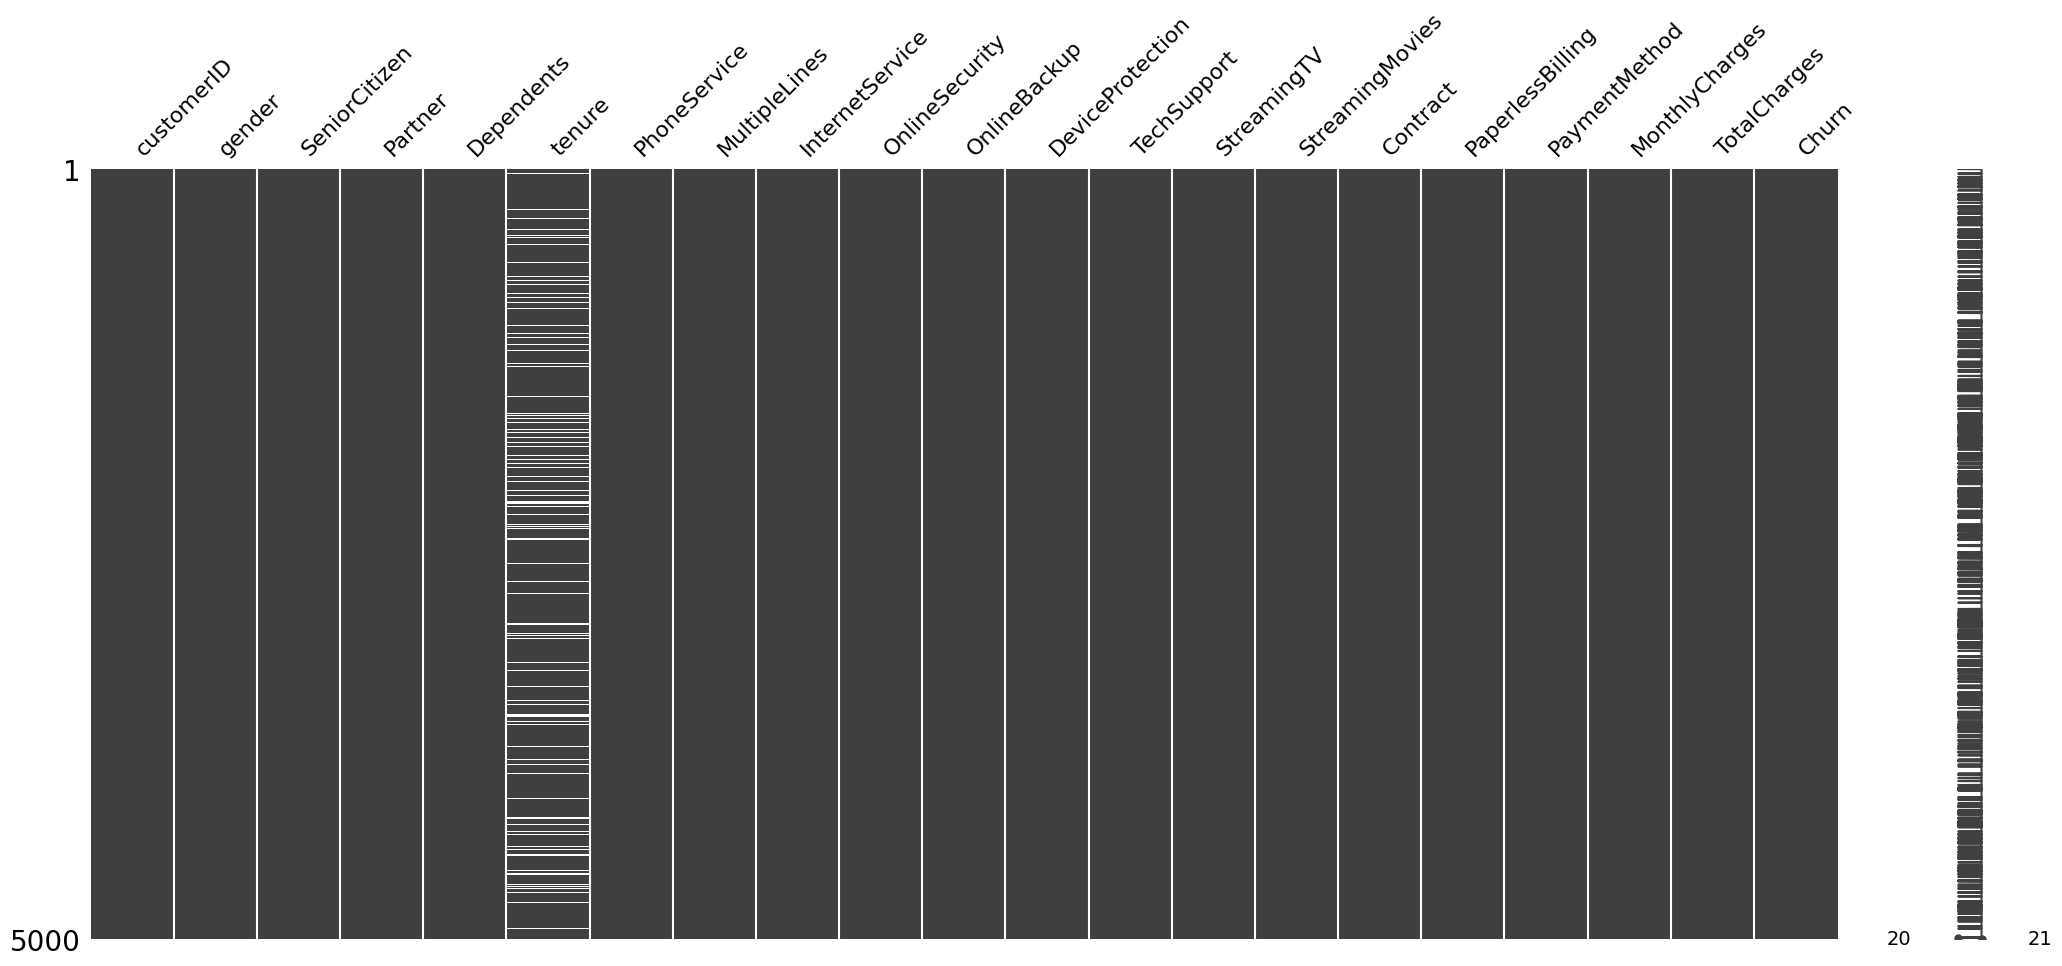

In [127]:
#Checking the missing values
import missingno as msno
msno.matrix(df)

In [128]:
df['tenure'].fillna(df['tenure'].median(), inplace=True)

In [129]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [130]:
df.loc[df['tenure'] == 1, 'MonthlyCharges'] = df['MonthlyCharges'].median()

In [131]:
df['gender'] = df['gender'].replace('Unknown', df['gender'].mode()[0])

In [132]:
df.duplicated().sum()

0

In [133]:
df['Age'] = df['tenure'] + np.random.randint(18, 25, df.shape[0])
df['average_monthly_charges'] = df['MonthlyCharges']
df['customer_lifetime_value'] = df['tenure'] * df['MonthlyCharges']

In [134]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age,average_monthly_charges,customer_lifetime_value
0,1024-GUALD,Female,0,Yes,No,29.0,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,24.800,24.80,Yes,52.0,24.800,719.200
1,0484-JPBRU,Male,0,No,No,41.0,Yes,Yes,No,No internet service,...,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.250,996.45,No,63.0,25.250,1035.250
2,3620-EHIMZ,Female,0,Yes,Yes,52.0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,19.350,1031.70,No,73.0,19.350,1006.200
3,6910-HADCM,Female,0,No,No,1.0,Yes,No,Fiber optic,No,...,No,Month-to-month,No,Electronic check,70.375,76.35,Yes,24.0,70.375,70.375
4,8587-XYZSF,Male,0,No,No,67.0,Yes,No,DSL,No,...,No,Two year,No,Bank transfer (automatic),50.550,3260.10,No,89.0,50.550,3386.850


In [135]:
df = df.drop('customerID', axis=1)

In [136]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Age',
       'average_monthly_charges', 'customer_lifetime_value'],
      dtype='object')

**UNIVARIATE ANALYSIS**

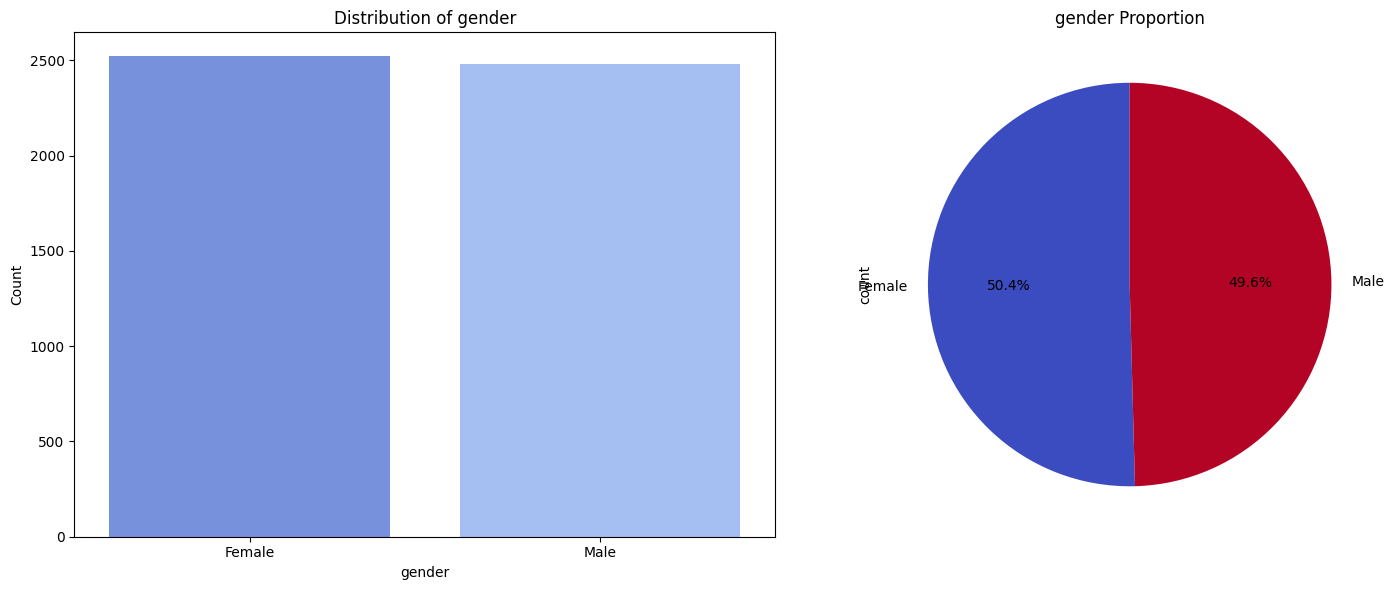

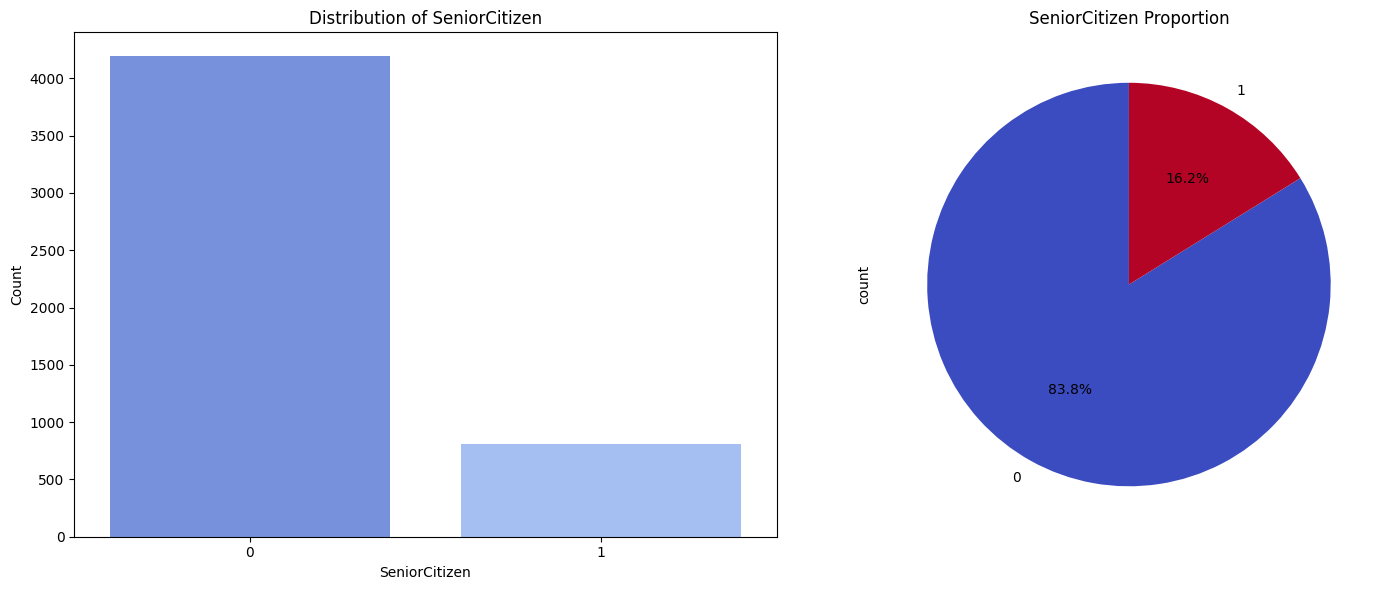

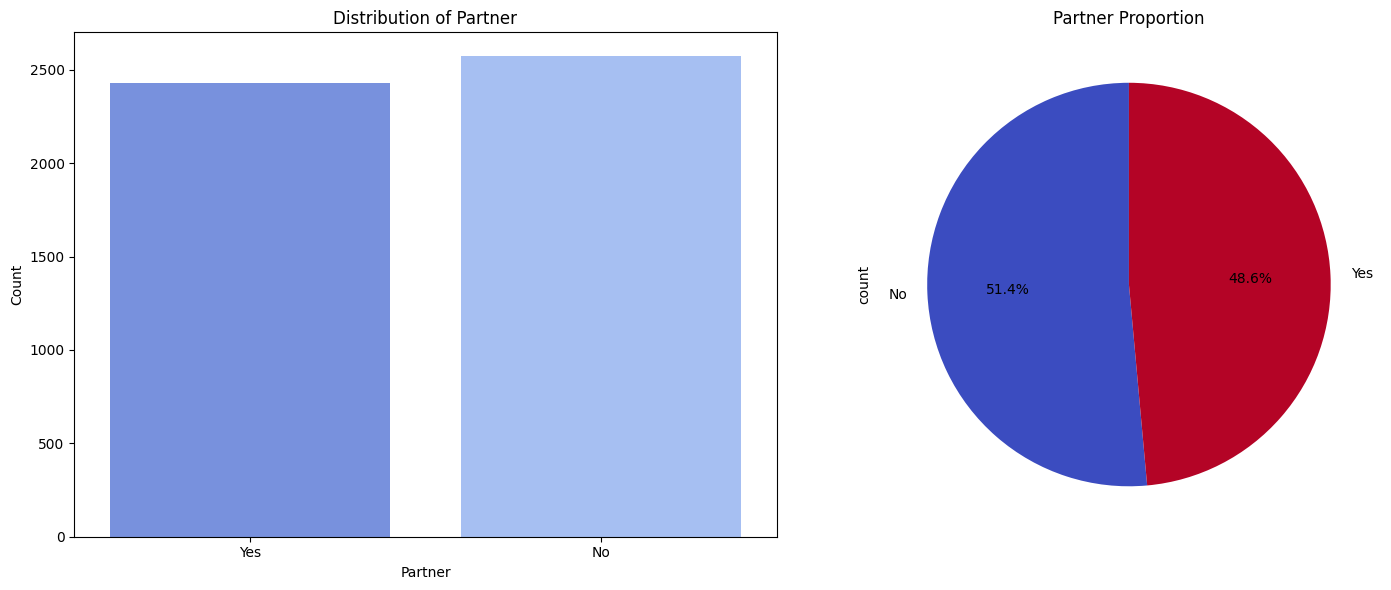

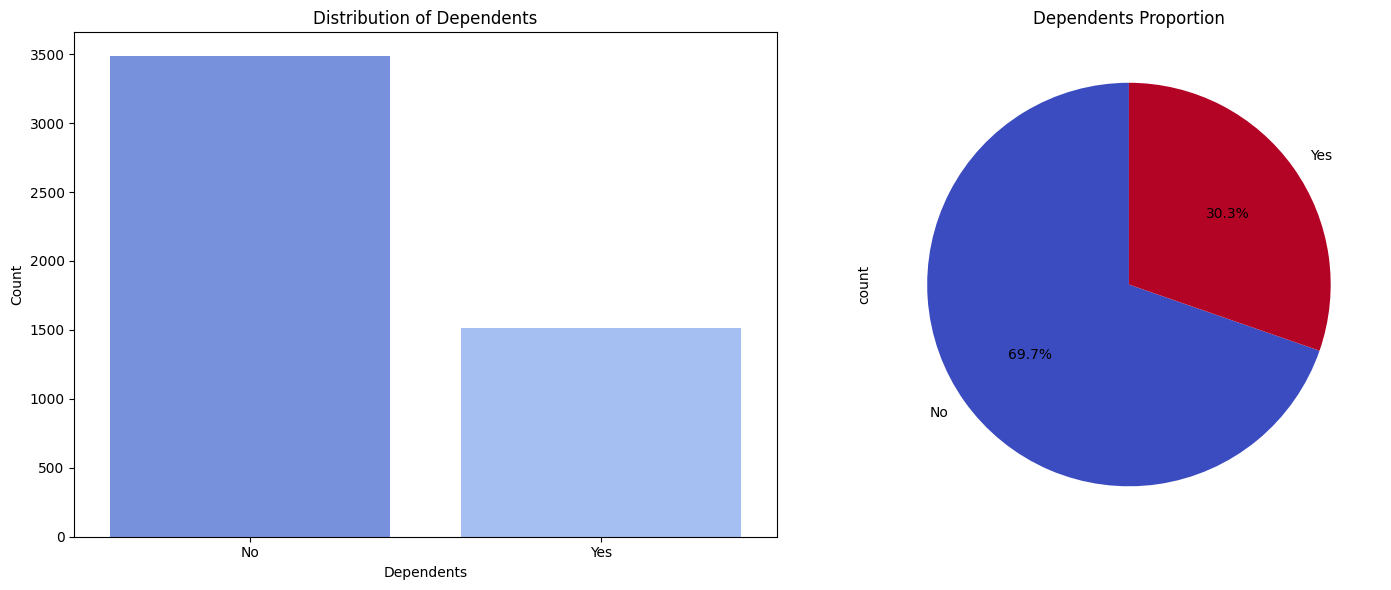

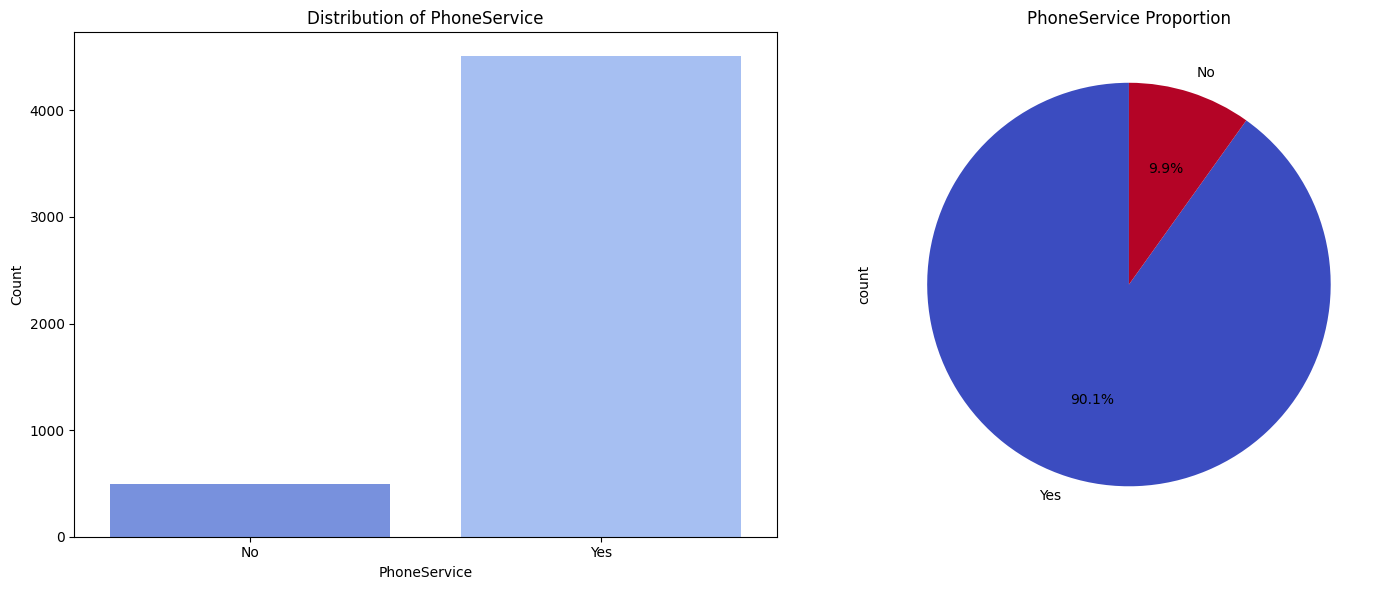

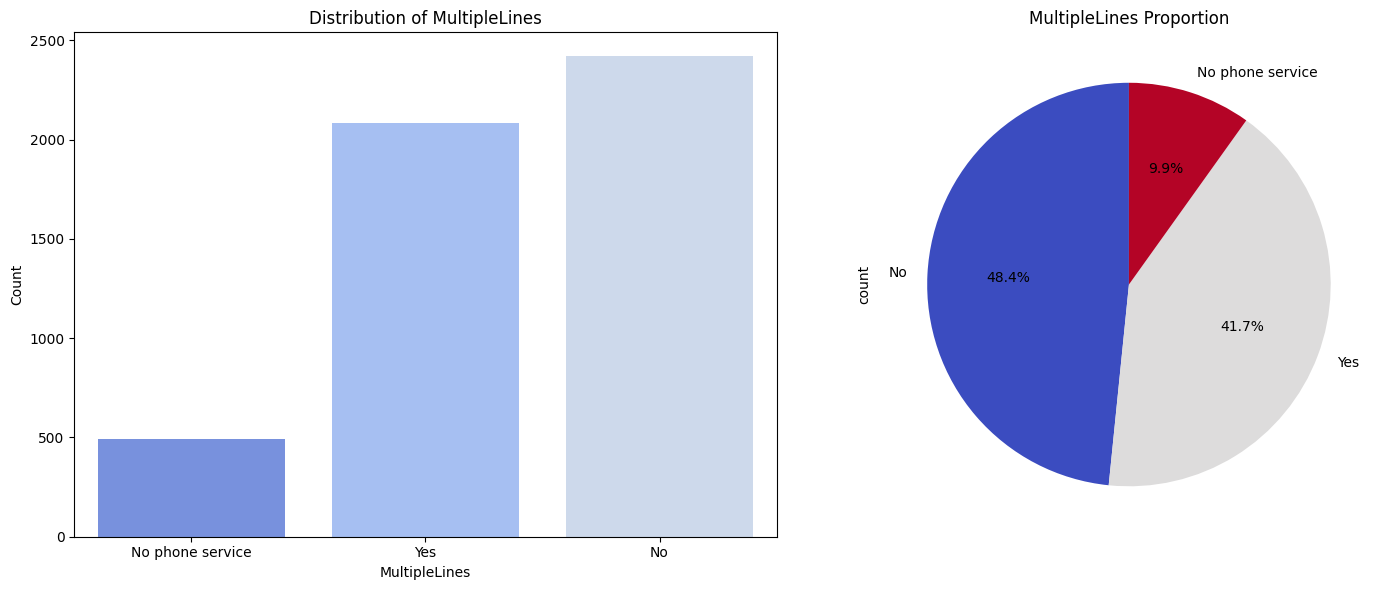

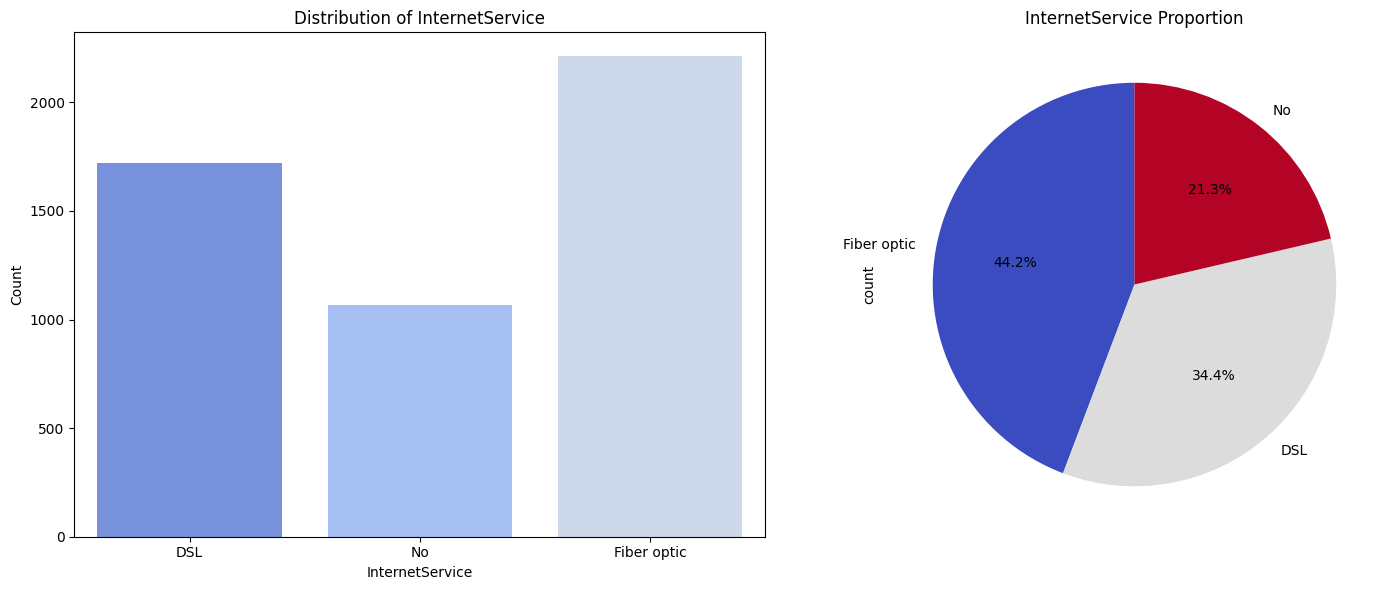

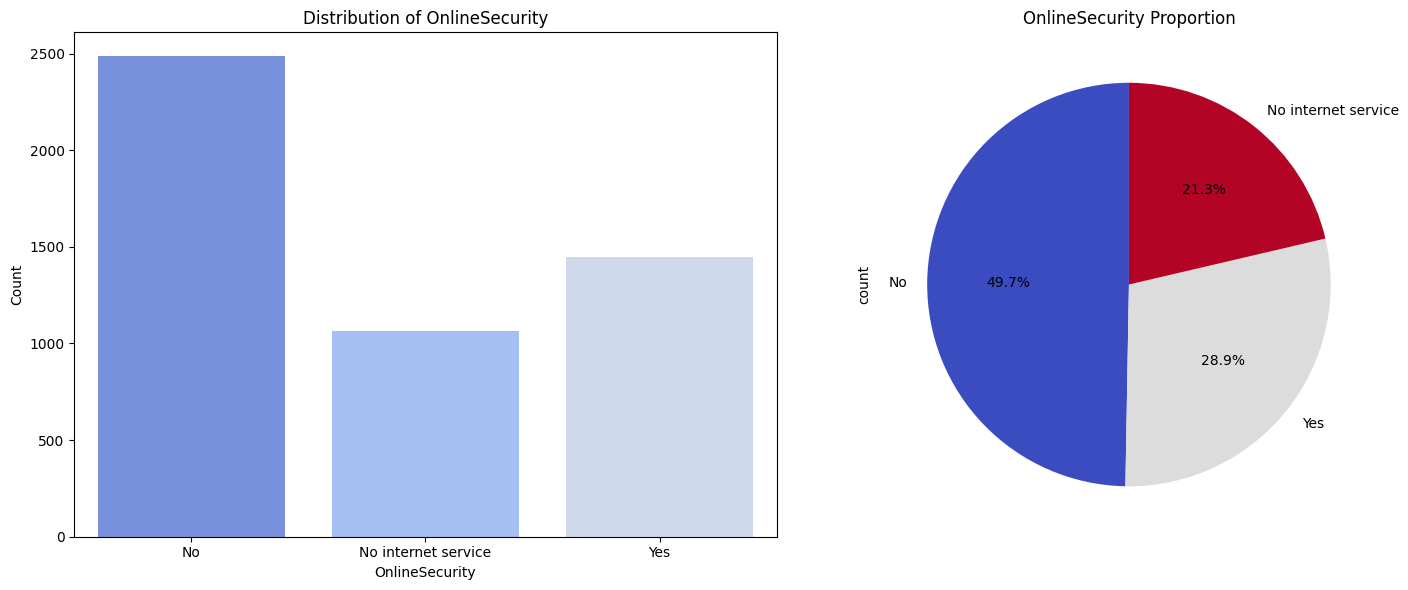

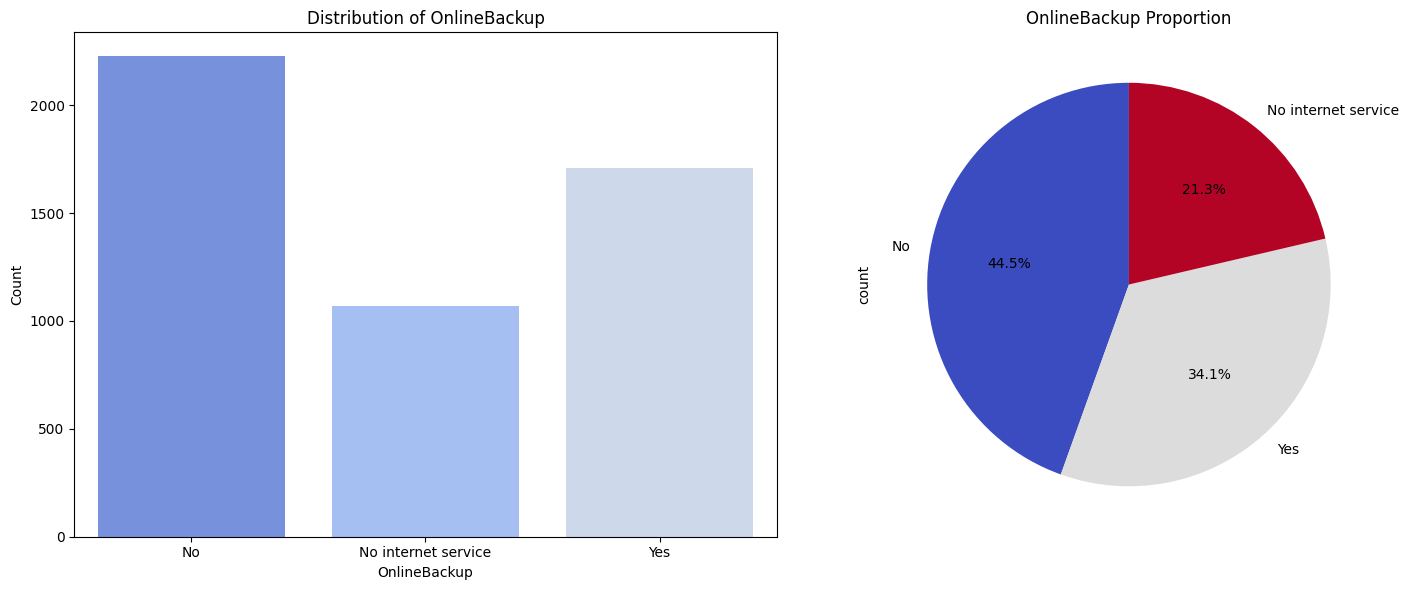

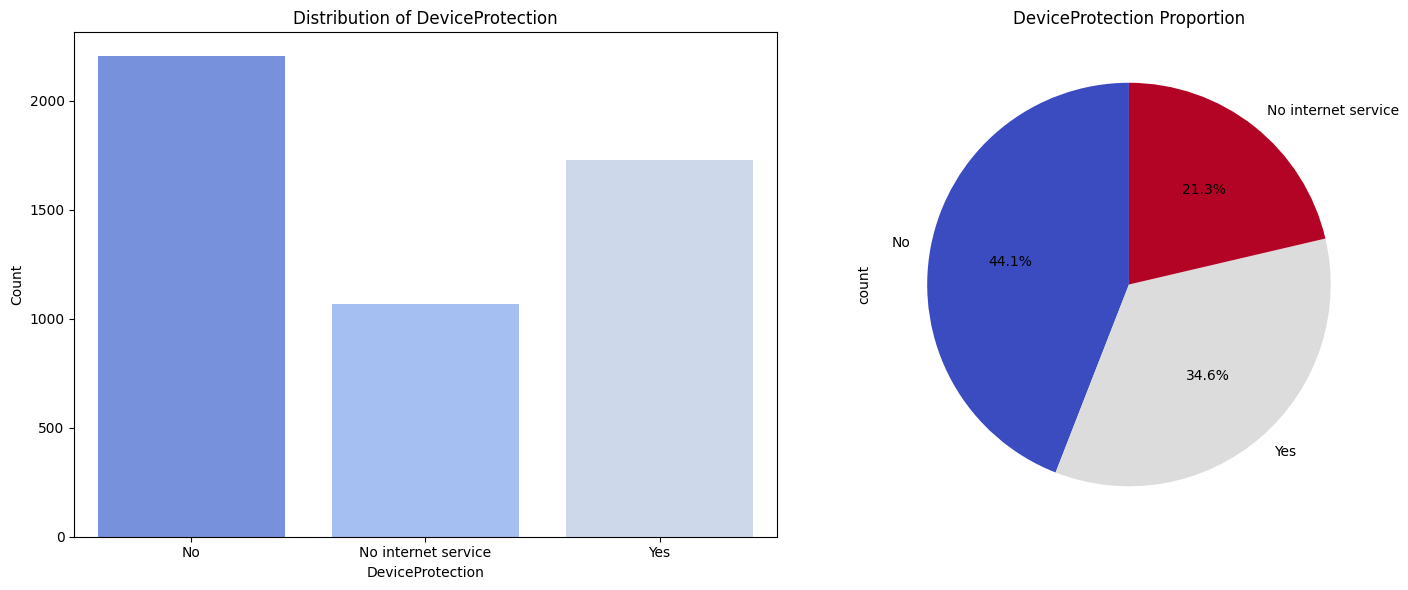

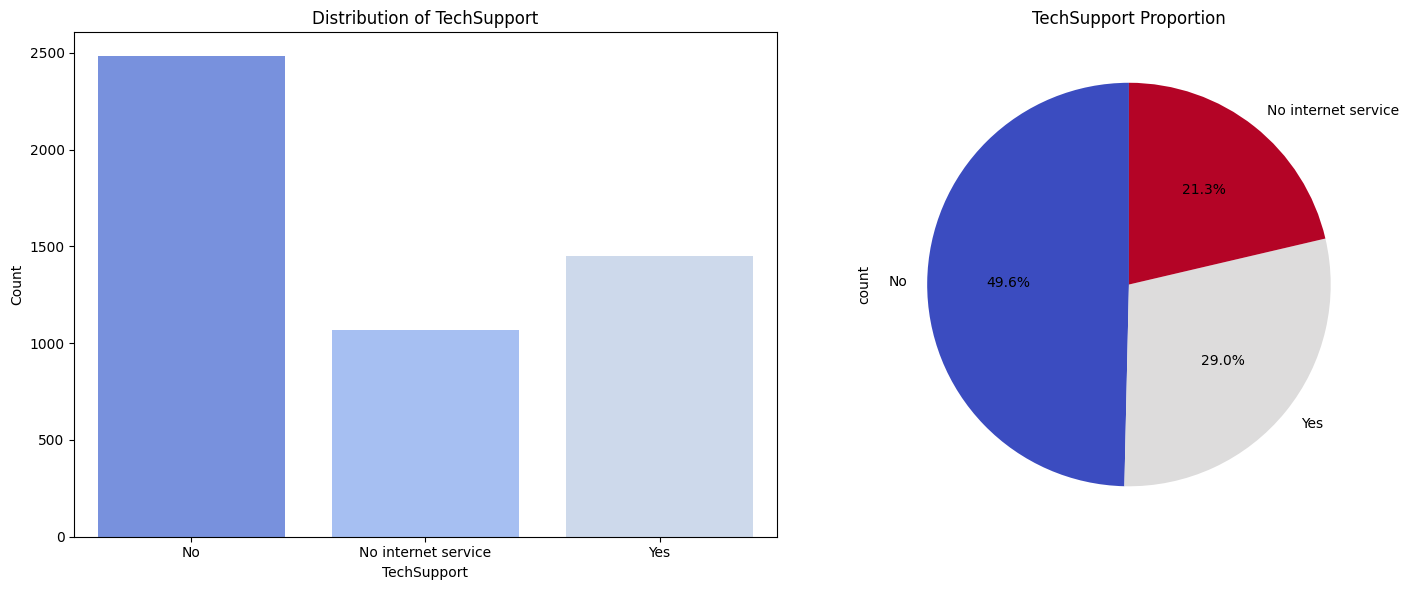

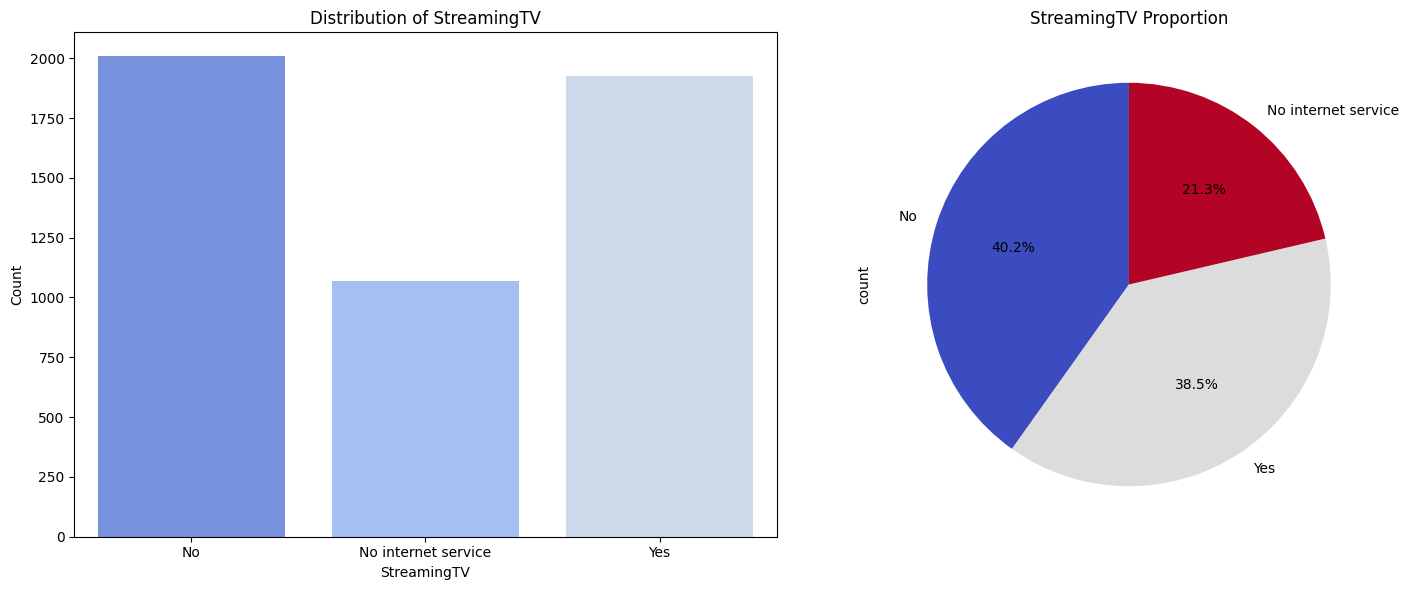

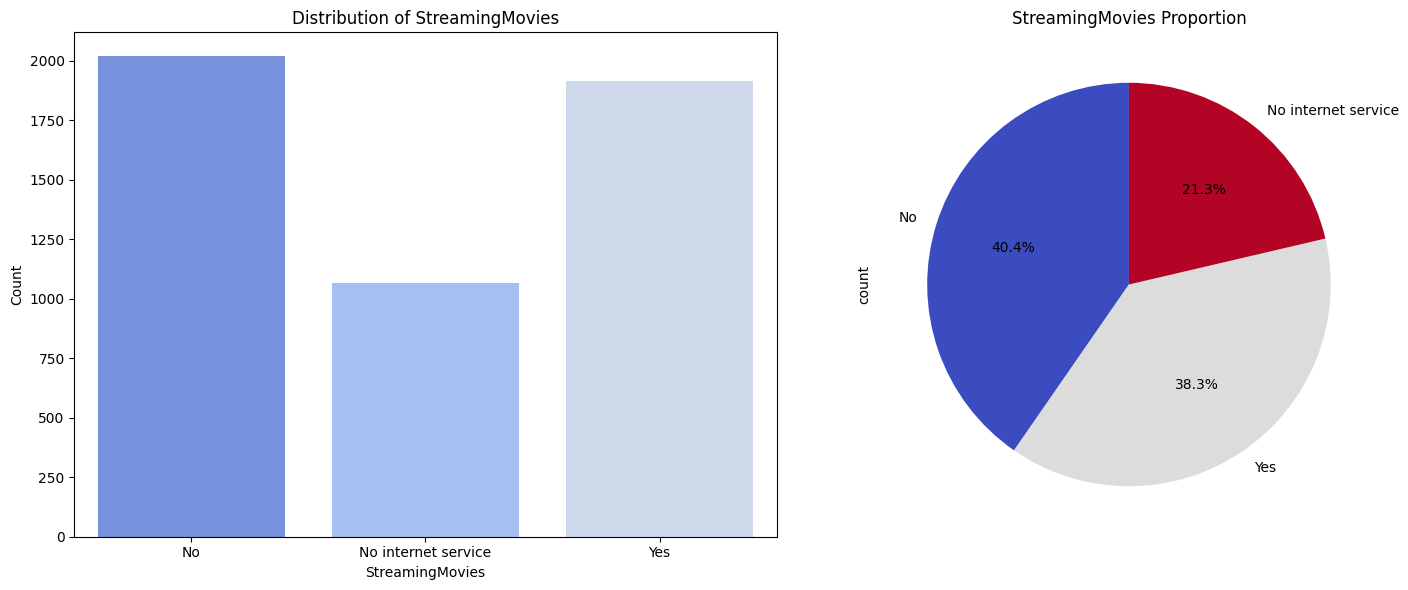

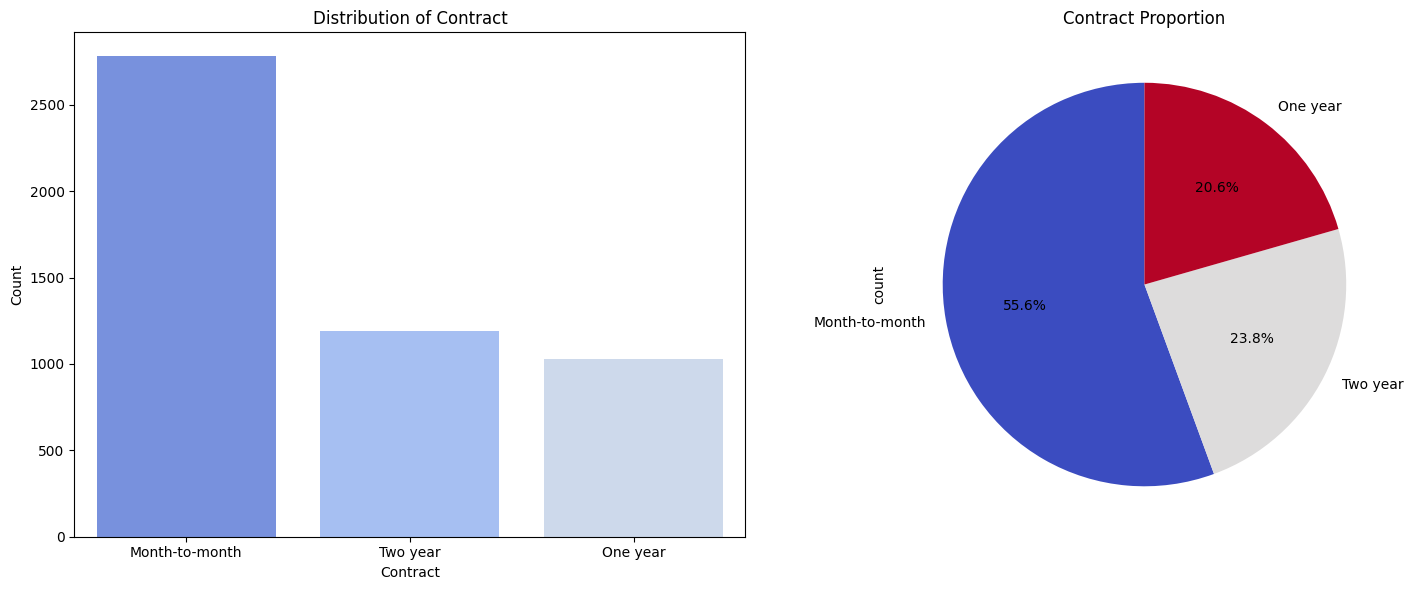

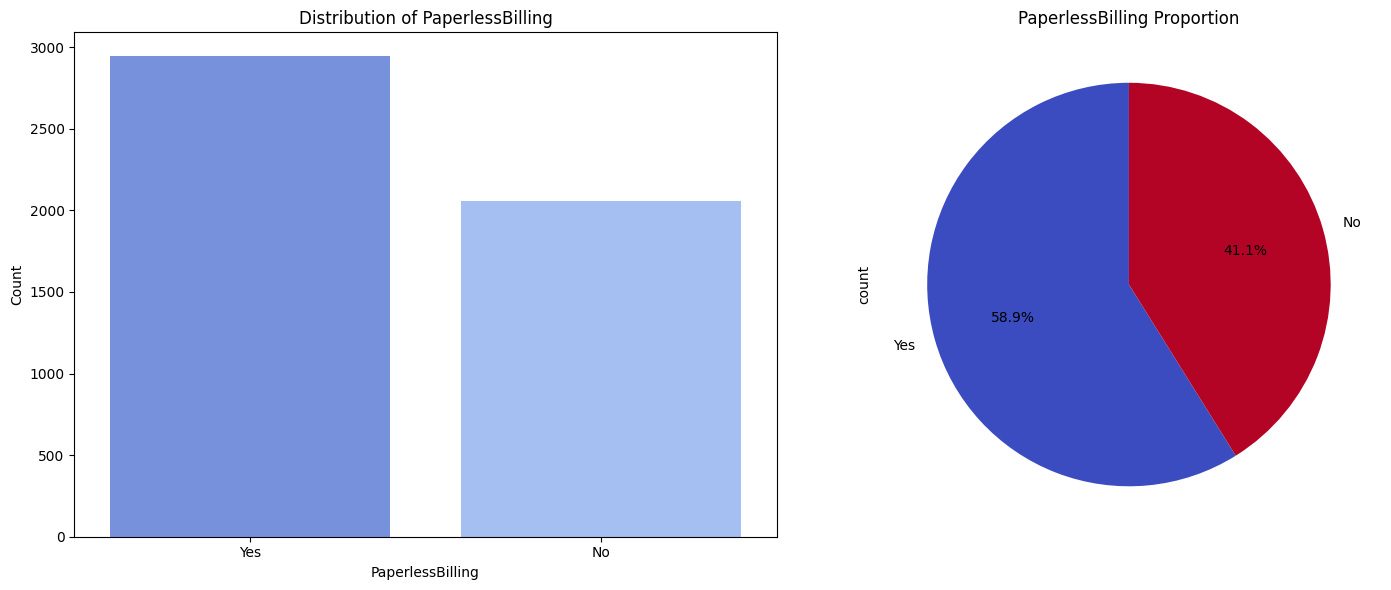

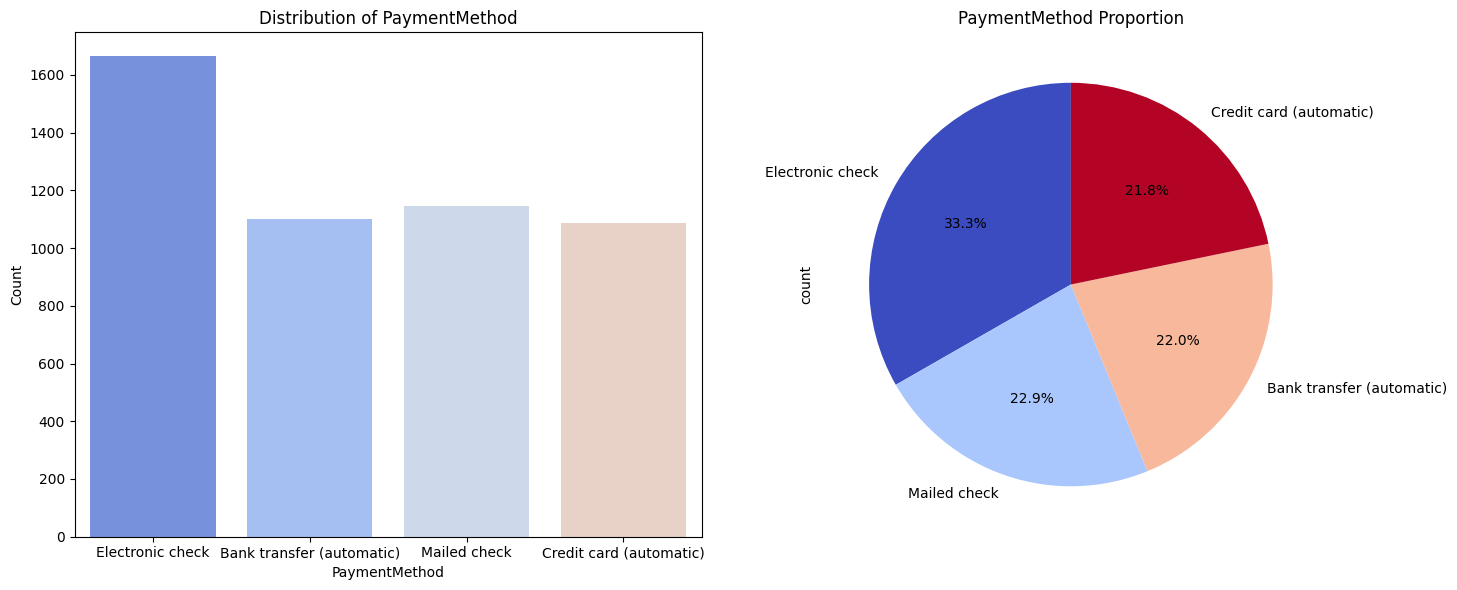

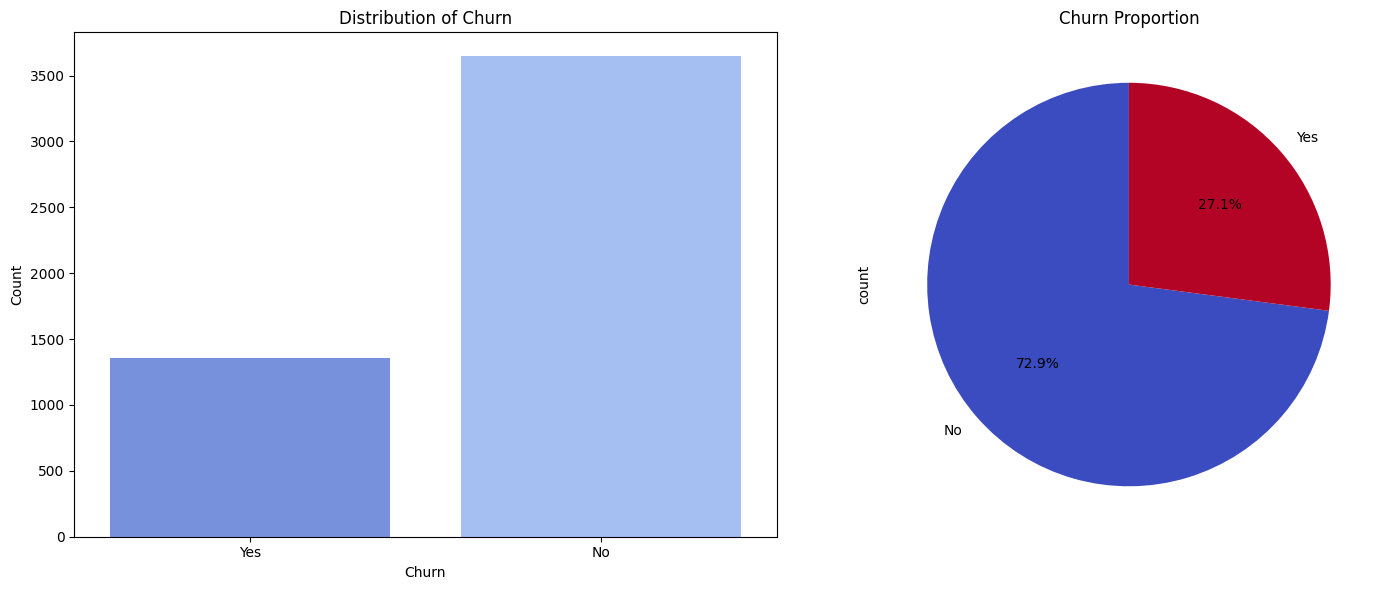

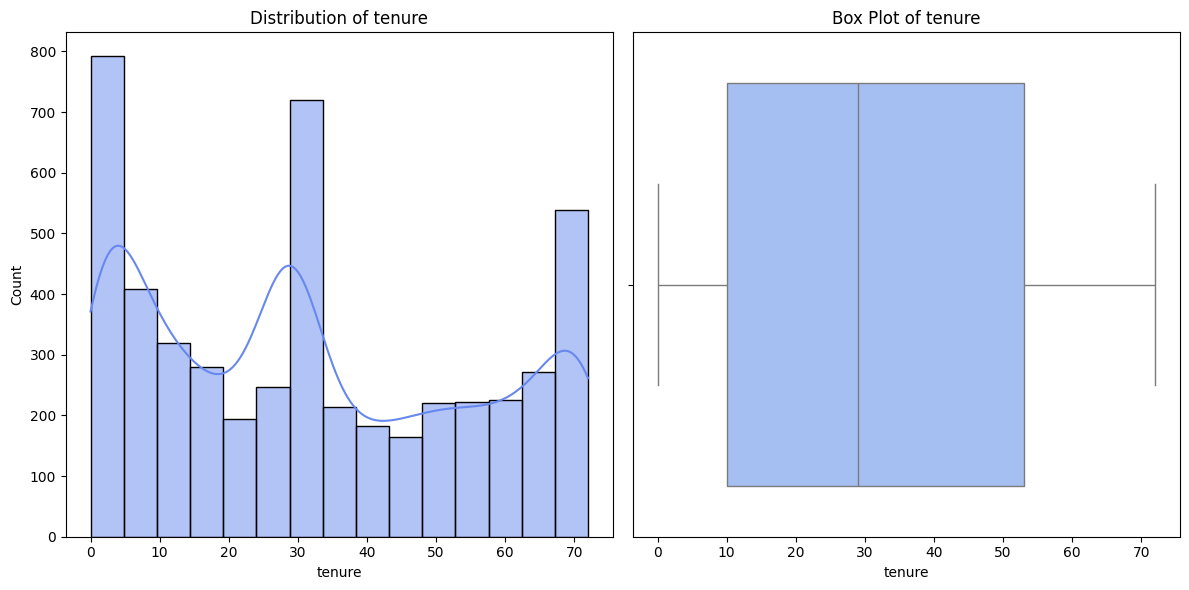

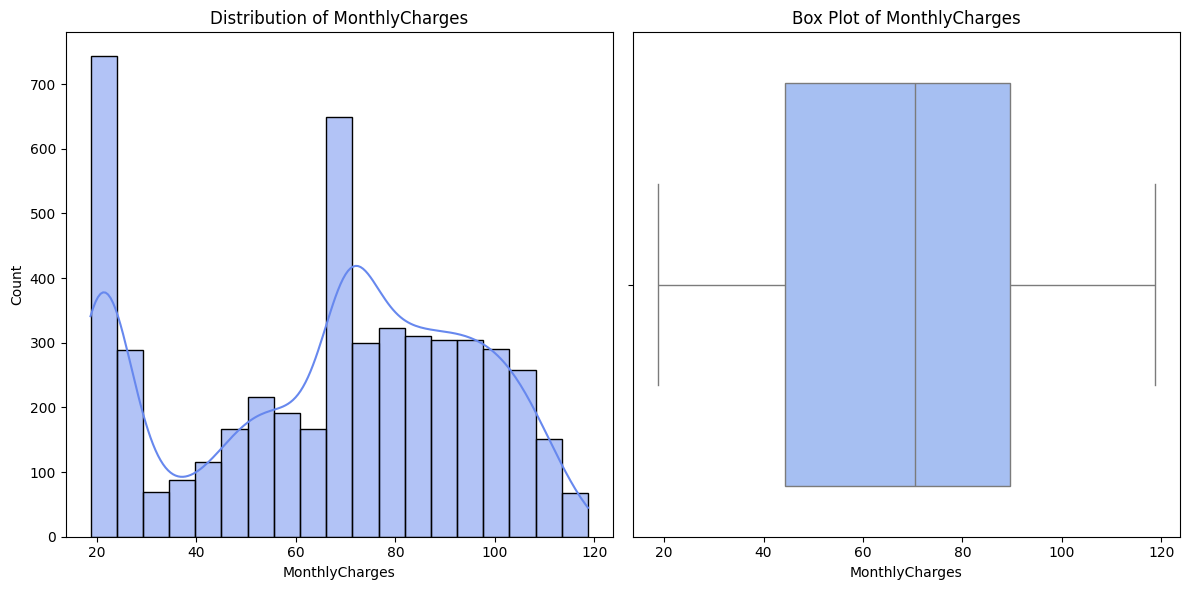

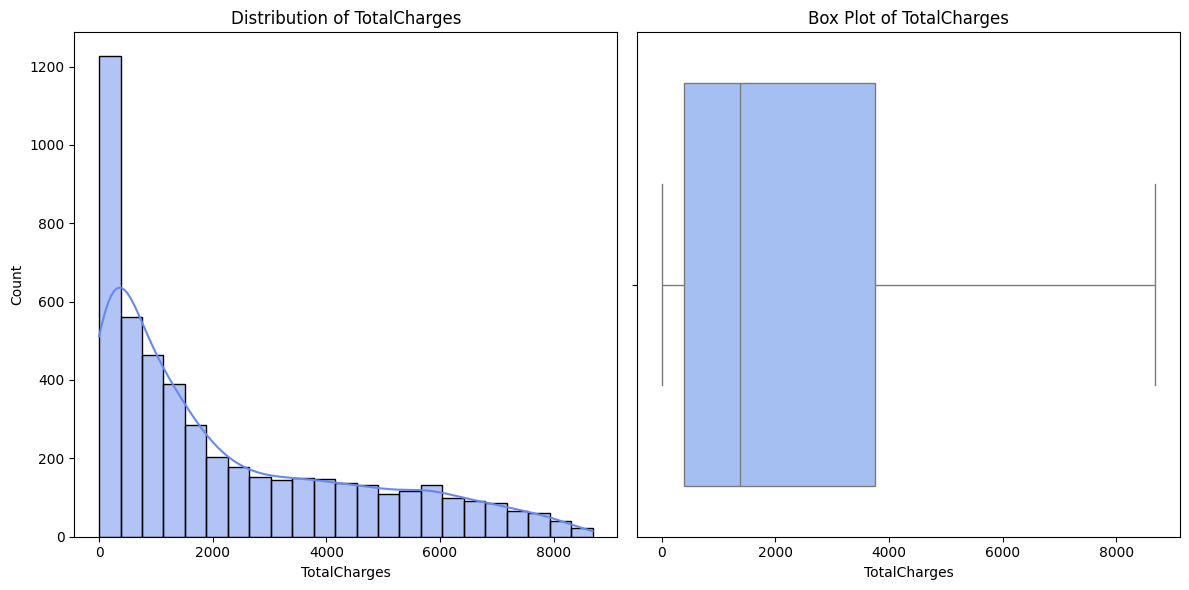

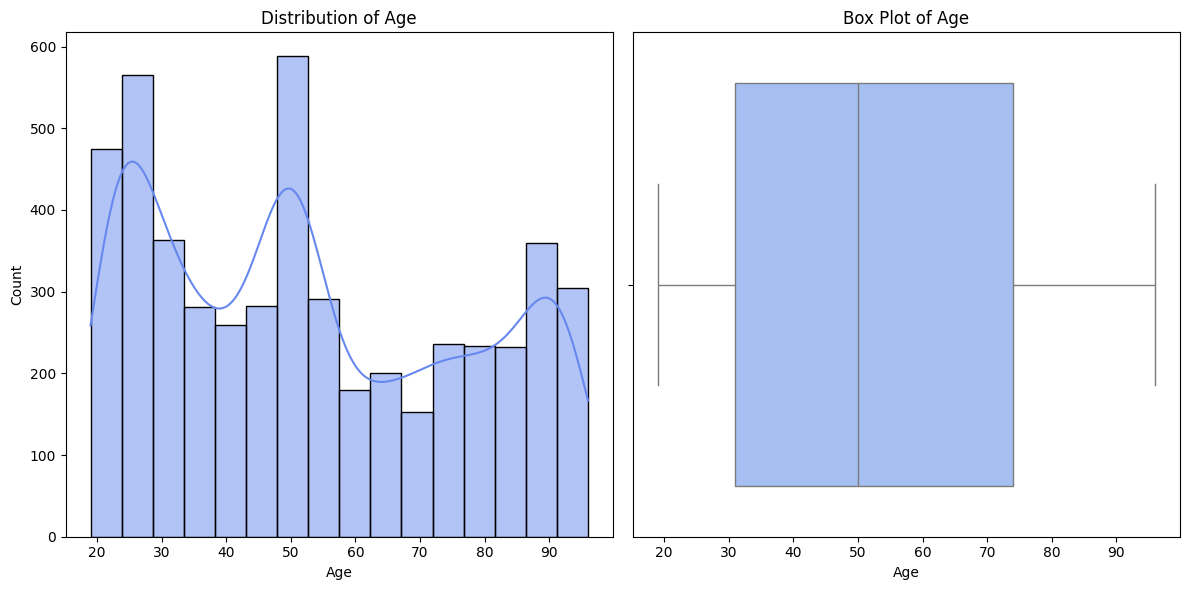

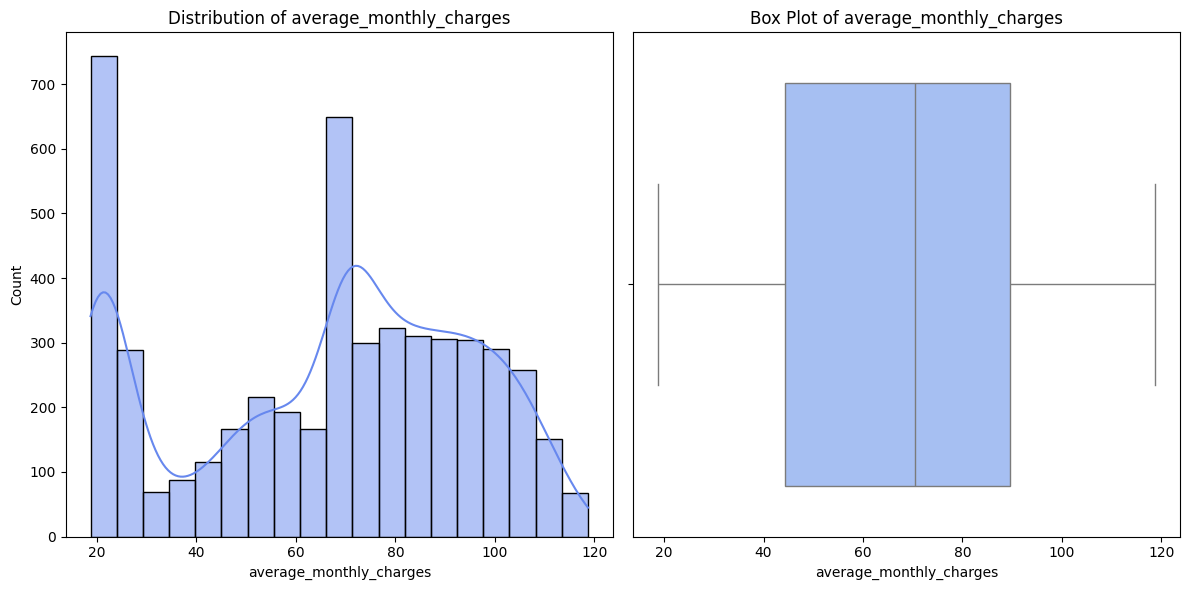

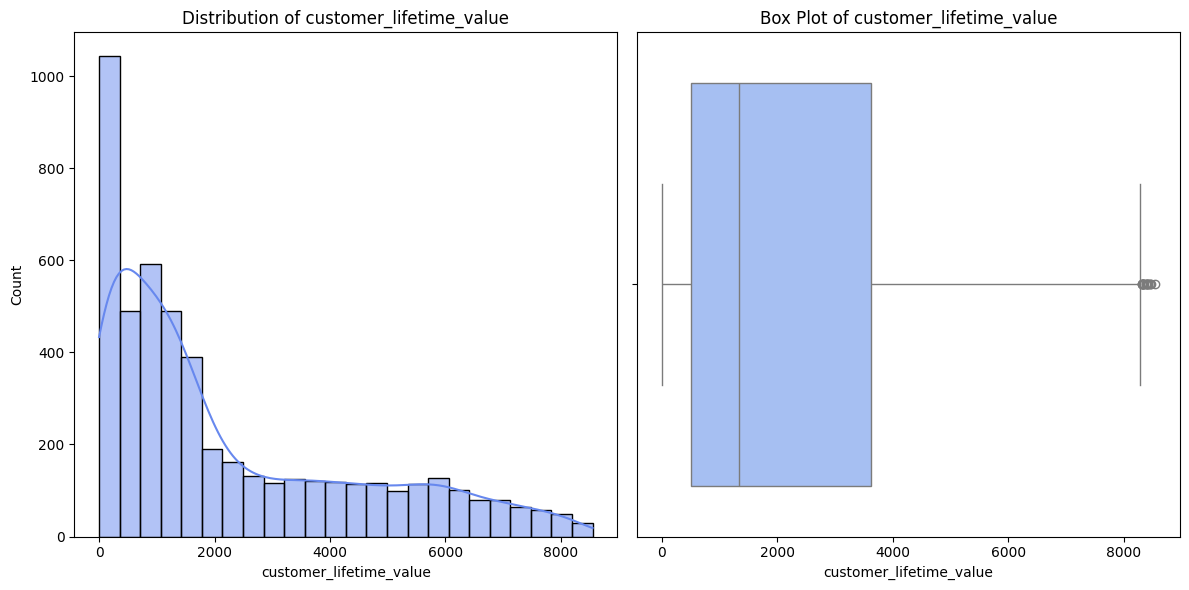

In [137]:
bar_palette = sns.color_palette("coolwarm", as_cmap=False)
pie_palette = sns.color_palette("coolwarm", as_cmap=True)

# Univariate analysis for categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                         'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for feature in categorical_features:
    plt.figure(figsize=(15, 6))

    # Bar plot with complementary palette
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=df, palette=bar_palette)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Pie chart with complementary palette
    plt.subplot(1, 2, 2)
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap=pie_palette)
    plt.title(f'{feature} Proportion')

    plt.tight_layout()
    plt.show()

# Univariate analysis for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Age',
                       'average_monthly_charges', 'customer_lifetime_value']

for feature in numerical_features:
    plt.figure(figsize=(12, 6))

    # Histogram with complementary color
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color=bar_palette[0])  # Use one of the complementary colors
    plt.title(f'Distribution of {feature}')

    # Box plot with complementary color
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color=bar_palette[1])  # Use the opposite complementary color
    plt.title(f'Box Plot of {feature}')

    plt.tight_layout()
    plt.show()

**BIVARIATE ANALYSIS**

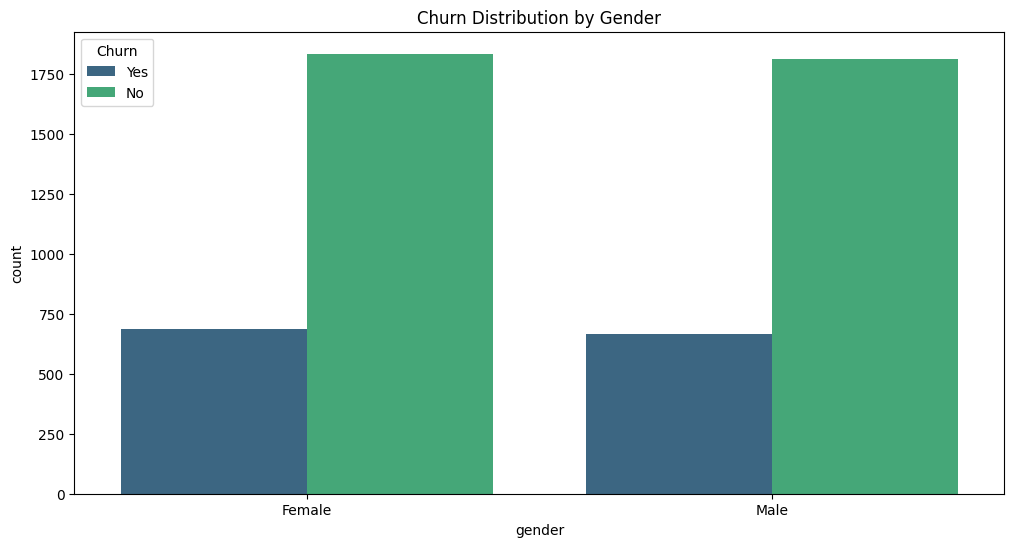

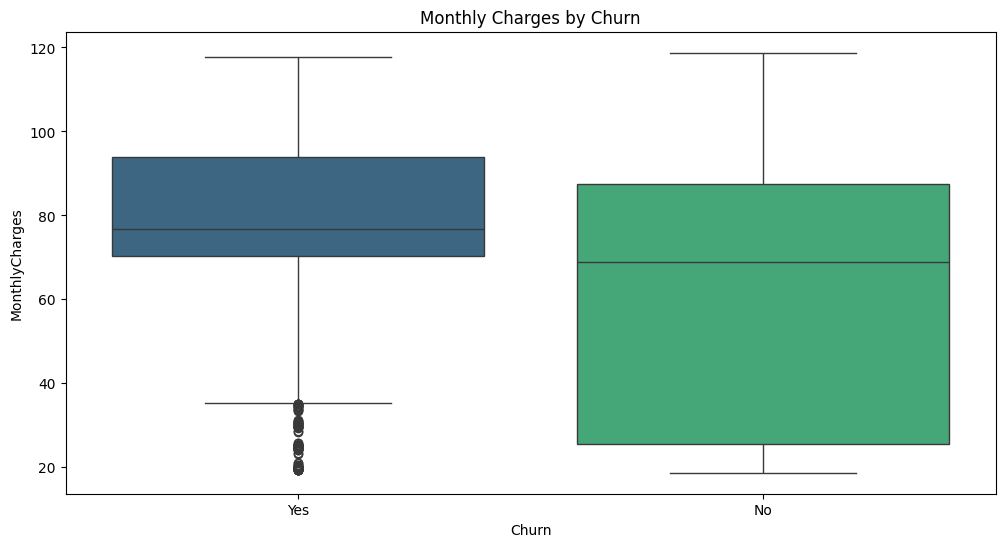

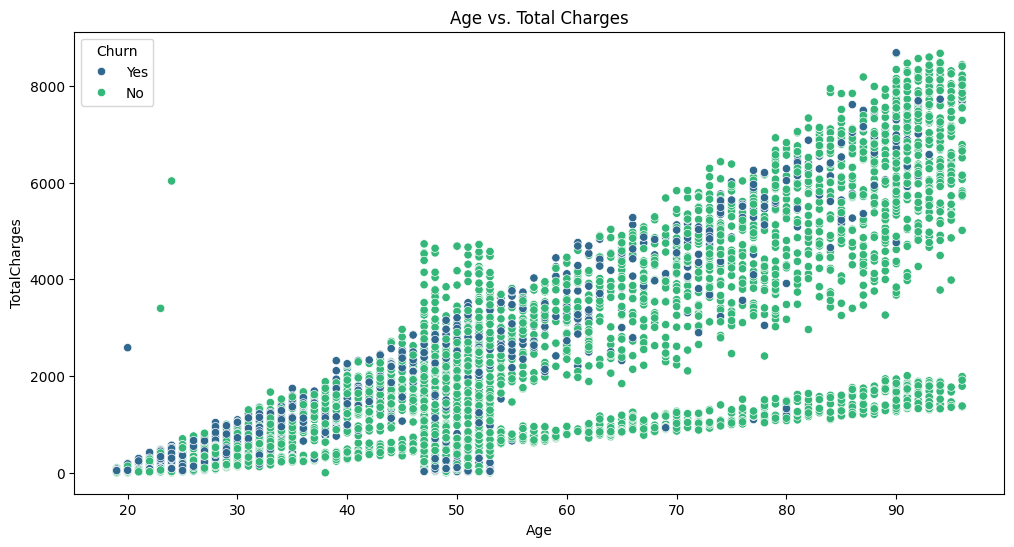

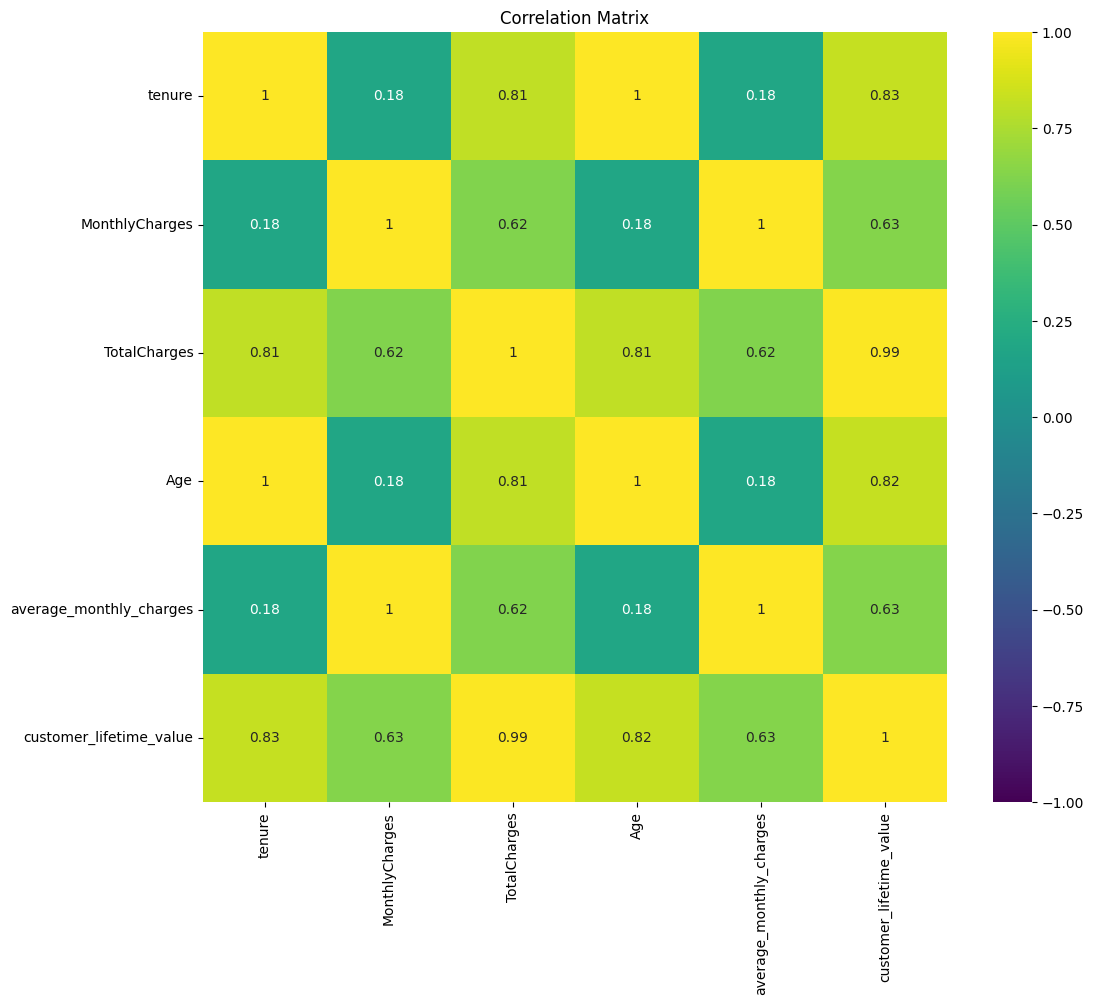

In [138]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Gender')
plt.show()

# Churn vs MonthlyCharges (Categorical vs Numerical)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')
plt.title('Monthly Charges by Churn')
plt.show()

# Age vs TotalCharges (Numerical vs Numerical)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='TotalCharges', data=df, hue='Churn', palette='viridis')
plt.title('Age vs. Total Charges')
plt.show()

# Correlation Matrix for Numerical Features
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**FEATURE ENGINEERING**

In [139]:
from sklearn.preprocessing import LabelEncoder

a = ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
     'StreamingMovies', 'Contract', 'PaymentMethod']

label_encoder = LabelEncoder()

for i in a:
    df[i] = label_encoder.fit_transform(df[i])


df = pd.get_dummies(df, columns=['Churn','PaperlessBilling','PhoneService','Dependents','Partner','gender'], drop_first=True)

In [140]:
a = ['Churn_Yes', 'PaperlessBilling_Yes','PhoneService_Yes', 'Dependents_Yes', 'Partner_Yes', 'gender_Male']

for i in a:
    df[i] = label_encoder.fit_transform(df[i])

In [141]:
df.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,TotalCharges,Age,average_monthly_charges,customer_lifetime_value,Churn_Yes,PaperlessBilling_Yes,PhoneService_Yes,Dependents_Yes,Partner_Yes,gender_Male
0,0,29.0,1,0,0,0,0,0,0,0,...,24.80,52.0,24.800,719.200,1,1,0,0,1,0
1,0,41.0,2,2,1,1,1,1,1,1,...,996.45,63.0,25.250,1035.250,0,1,1,0,0,1
2,0,52.0,0,2,1,1,1,1,1,1,...,1031.70,73.0,19.350,1006.200,0,0,1,1,1,0
3,0,1.0,0,1,0,0,2,0,0,0,...,76.35,24.0,70.375,70.375,1,0,1,0,0,0
4,0,67.0,0,0,0,0,0,2,0,0,...,3260.10,89.0,50.550,3386.850,0,0,1,0,0,1


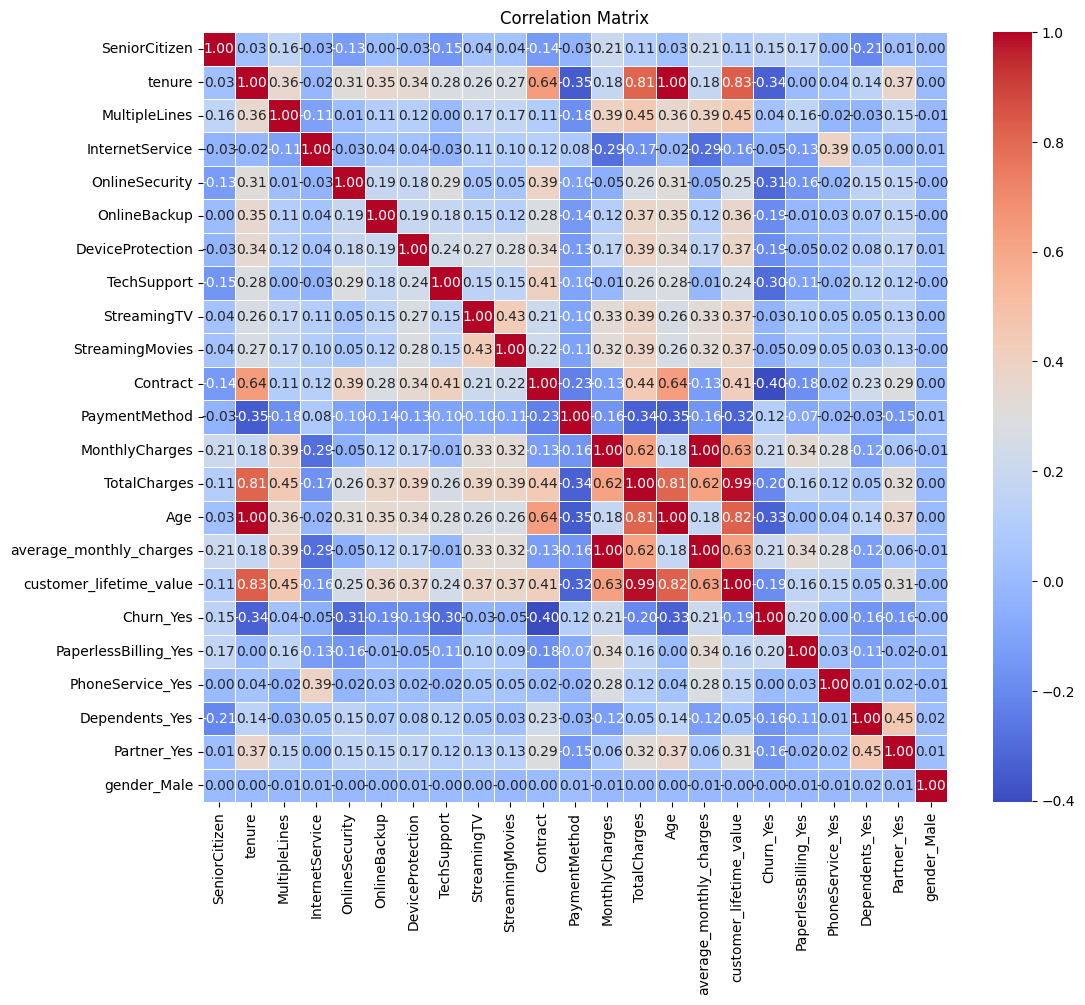

Correlation with the target variable 'Churn':
Churn_Yes                  1.000000
MonthlyCharges             0.207189
average_monthly_charges    0.207189
PaperlessBilling_Yes       0.195528
SeniorCitizen              0.150634
PaymentMethod              0.117029
MultipleLines              0.040136
PhoneService_Yes           0.002678
gender_Male               -0.002982
StreamingTV               -0.028689
StreamingMovies           -0.045231
InternetService           -0.050137
Partner_Yes               -0.158043
Dependents_Yes            -0.161108
DeviceProtection          -0.185975
customer_lifetime_value   -0.188878
OnlineBackup              -0.191337
TotalCharges              -0.203068
TechSupport               -0.295215
OnlineSecurity            -0.306744
Age                       -0.333374
tenure                    -0.335420
Contract                  -0.402613
Name: Churn_Yes, dtype: float64


In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# If interested in the correlation with the target variable
target_corr = corr_matrix['Churn_Yes'].sort_values(ascending=False)
print("Correlation with the target variable 'Churn':")
print(target_corr)

**Actions Based on Correlation:**

*   Retain High Positive Correlation Features: Keep features like MonthlyCharges, average_monthly_charges, and PaperlessBilling_Yes in your model as they have a positive impact on Churn.
*   Retain High Negative Correlation Features: Include features like Contract, TechSupport, OnlineSecurity, and tenure because they negatively correlate with churn, implying that they are beneficial for predicting lower churn.

In [143]:
#Create Interaction Features of MonthlyCharges & PaperlessBilling_Yes to capture the combined effect of billing type and charges on churn.

df['Charges_PaperlessInteraction'] = df['MonthlyCharges'] * df['PaperlessBilling_Yes']
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Create Polynomial Features for features like MonthlyCharges and tenure, create polynomial terms to capture non-linear relationships.
poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = poly.fit_transform(df[['MonthlyCharges', 'tenure']])
feature_names = poly.get_feature_names_out(['MonthlyCharges', 'tenure'])
X_poly_df = pd.DataFrame(df_poly, columns=feature_names)

df = pd.concat([df, X_poly_df], axis=1)

In [144]:
#Create bins for continuous variables like MonthlyCharges to capture non-linear patterns.
if isinstance(df['MonthlyCharges'], pd.DataFrame):
    monthly_charges_series = df['MonthlyCharges'].iloc[:, 0]
else:
    monthly_charges_series = df['MonthlyCharges']

bins = [0, 30, 60, 90, 120]
labels = ['Low', 'Medium', 'High', 'Very High']

# Apply pd.cut
df['MonthlyCharges_Binned'] = pd.cut(monthly_charges_series, bins=bins, labels=labels)


In [145]:
df['MonthlyCharges_Binned'] = label_encoder.fit_transform(df['MonthlyCharges_Binned'])

**Checking for the outliers or extremeties**

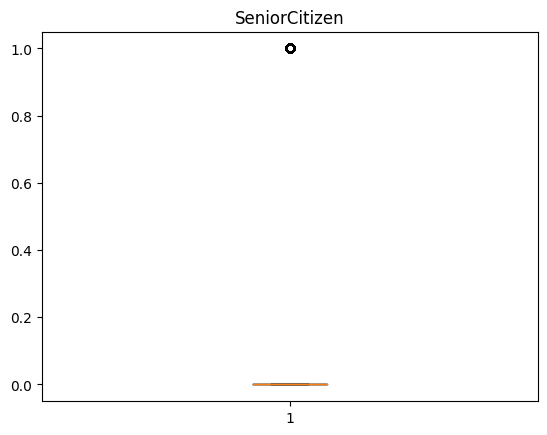

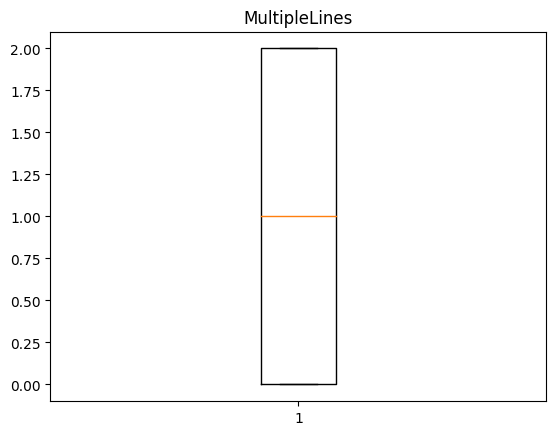

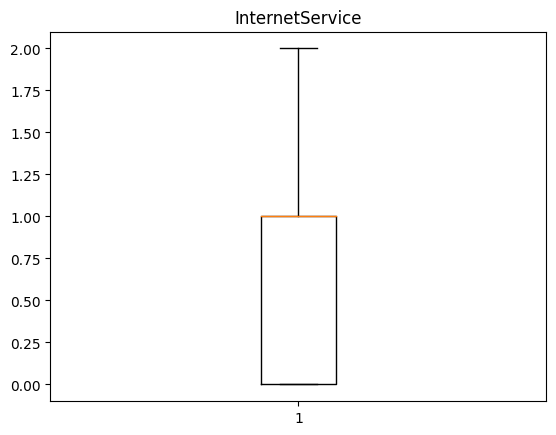

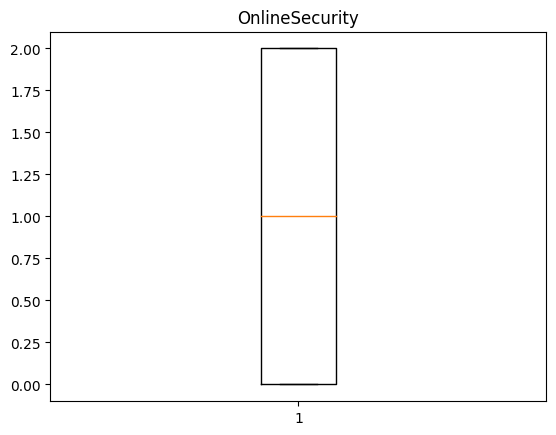

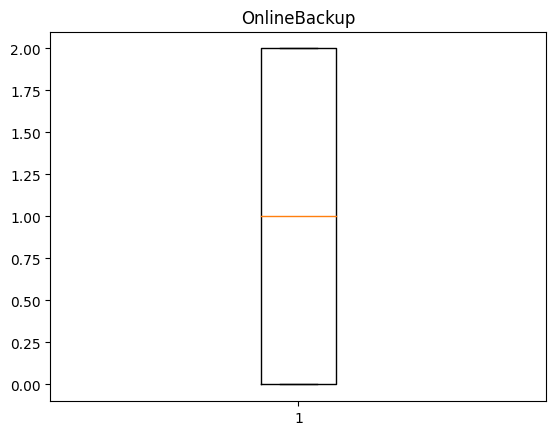

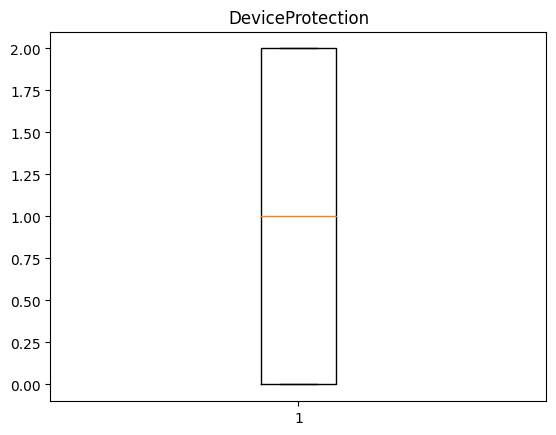

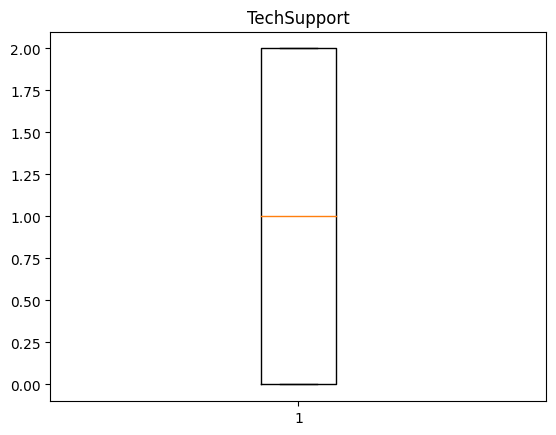

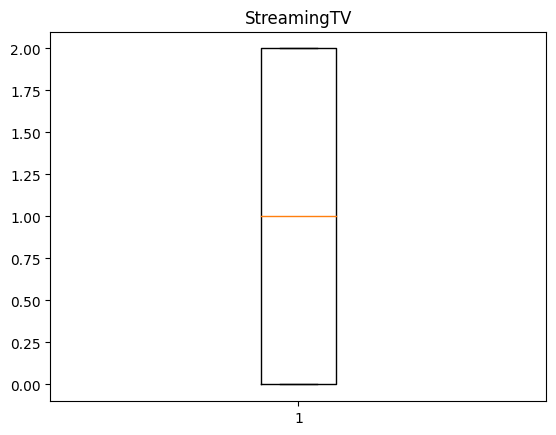

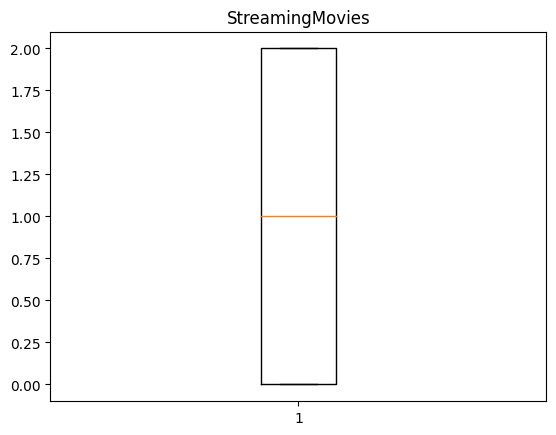

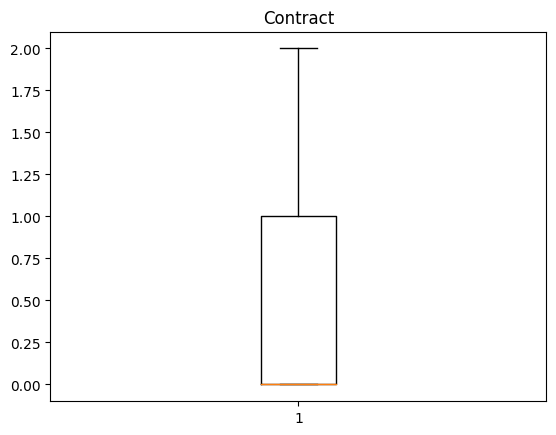

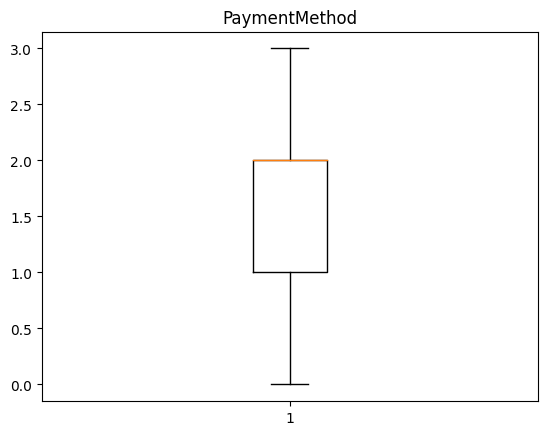

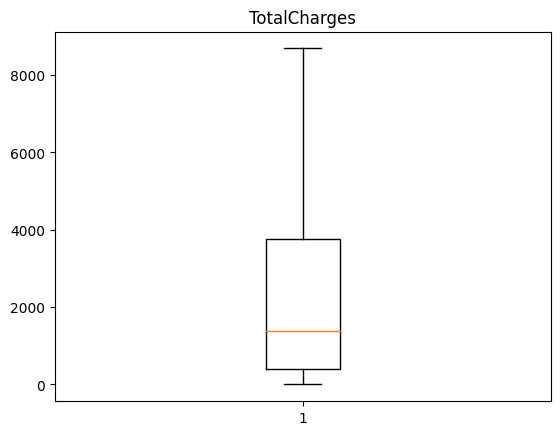

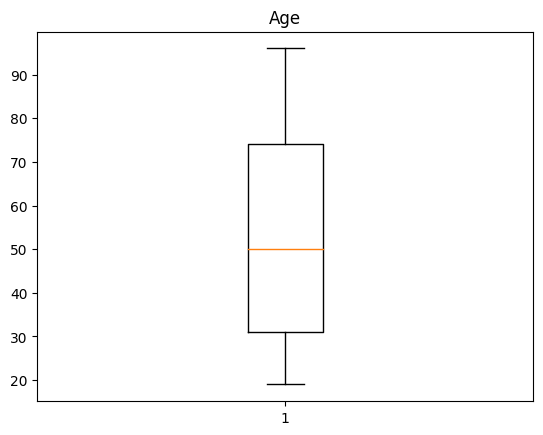

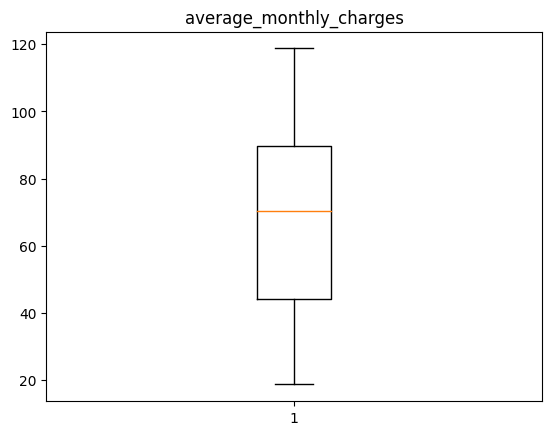

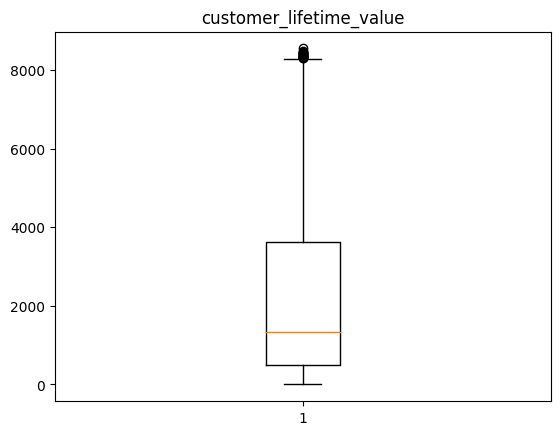

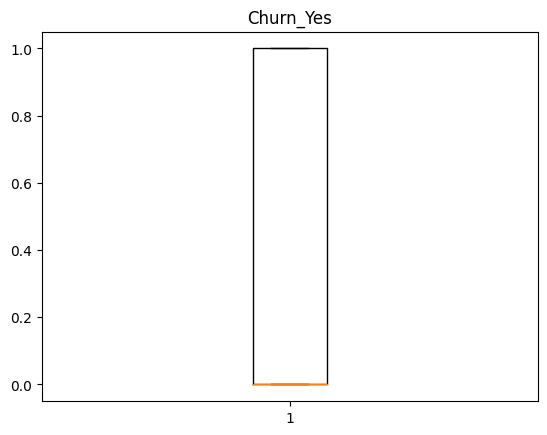

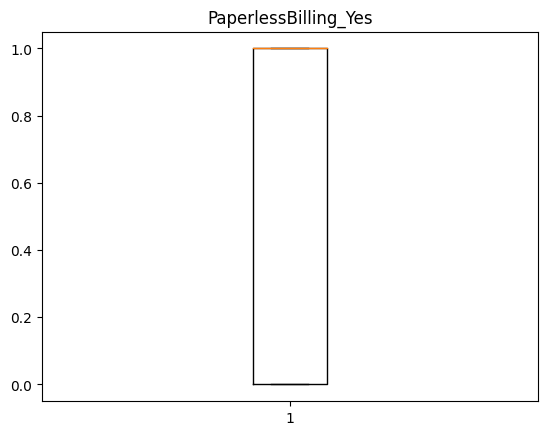

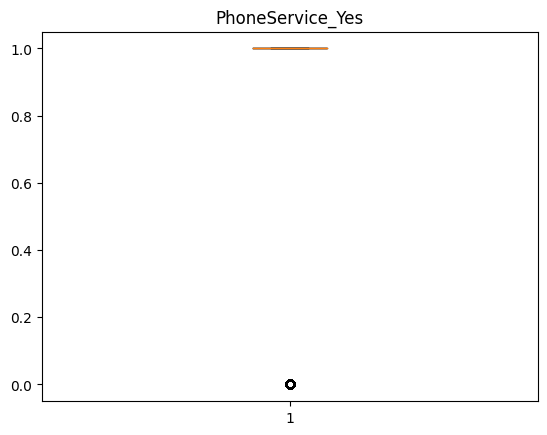

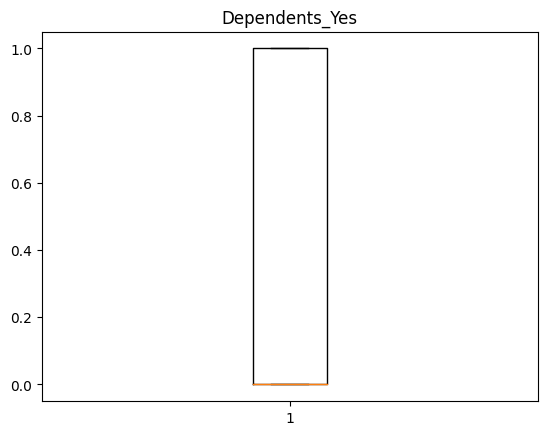

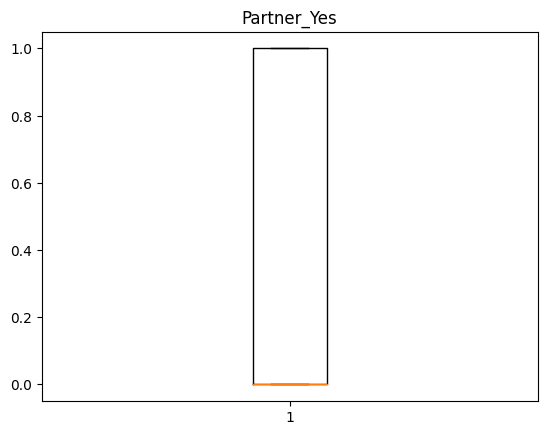

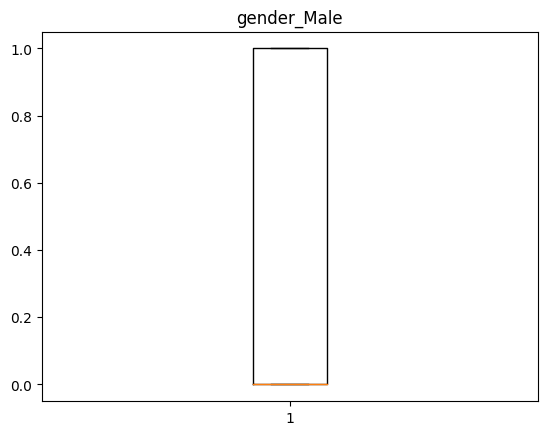

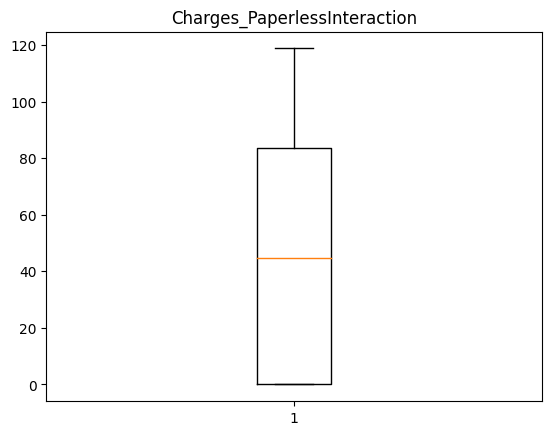

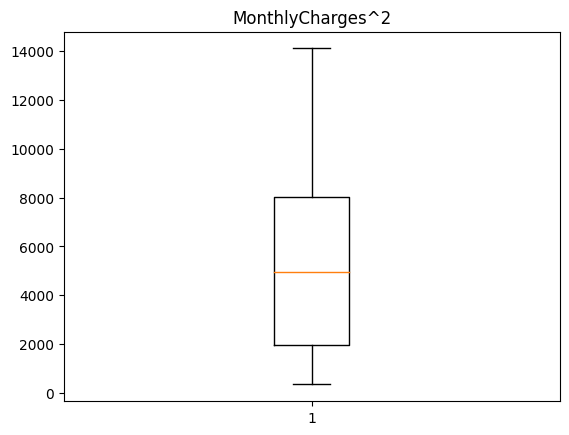

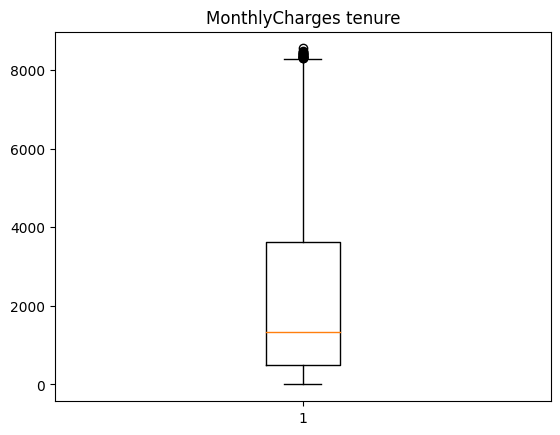

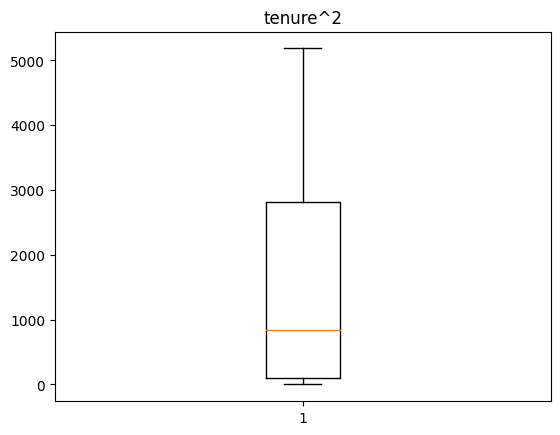

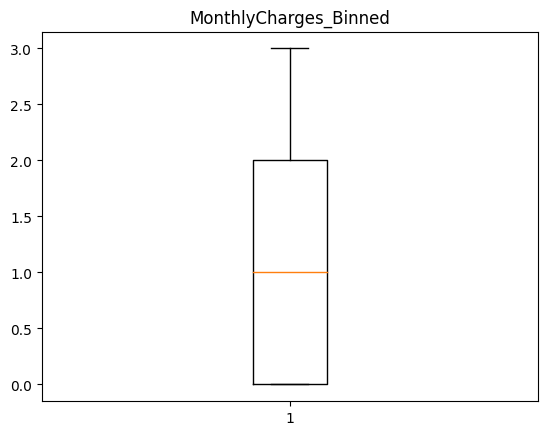

In [146]:
for i in df.columns:
  if pd.api.types.is_numeric_dtype(df[i]):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [147]:
#Removing the outliers
Q3 = df['customer_lifetime_value'].quantile(q=0.75)
Q1 = df['customer_lifetime_value'].quantile(q=0.25)
IQR = Q3 - Q1

up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

df['customer_lifetime_value'] = cap_extreme_values(df['customer_lifetime_value'], down, up)

In [148]:
Q3 = df['MonthlyCharges tenure'].quantile(q=0.75)
Q1 = df['MonthlyCharges tenure'].quantile(q=0.25)
IQR = Q3 - Q1

up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

df['MonthlyCharges tenure'] = cap_extreme_values(df['MonthlyCharges tenure'], down, up)

In [149]:
df=df.drop(['MonthlyCharges','tenure'],axis=1)

#**MODEL BUILDING**

In [150]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to be scaled
columns_to_scale = ['Charges_PaperlessInteraction','MonthlyCharges^2','MonthlyCharges tenure','tenure^2','customer_lifetime_value','average_monthly_charges','Age','TotalCharges']

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [151]:
df['Churn_Yes'].value_counts()

,count
Churn_Yes,
0,3646
1,1354


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame and 'Churn' is the target variable
# Separating features and target variable
X = df.drop(['Churn_Yes'], axis=1)
y = df['Churn_Yes']

# Initialize the model
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit RFE
model.fit(X_train, y_train)

LogisticRegression()

Since the target variable Churn_Yes is highly imbalanced, we have resample it. We will do it with SMOTE

In [153]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [154]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [155]:
model_new = LogisticRegression()

In [156]:
from sklearn.metrics import classification_report
# Import the metrics module from sklearn
from sklearn import metrics
model_new.fit(xr_train,yr_train)
yr_predict = model_new.predict(xr_test)
model_score_r = model_new.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       404
           1       0.93      0.95      0.94       481

    accuracy                           0.93       885
   macro avg       0.93      0.93      0.93       885
weighted avg       0.93      0.93      0.93       885



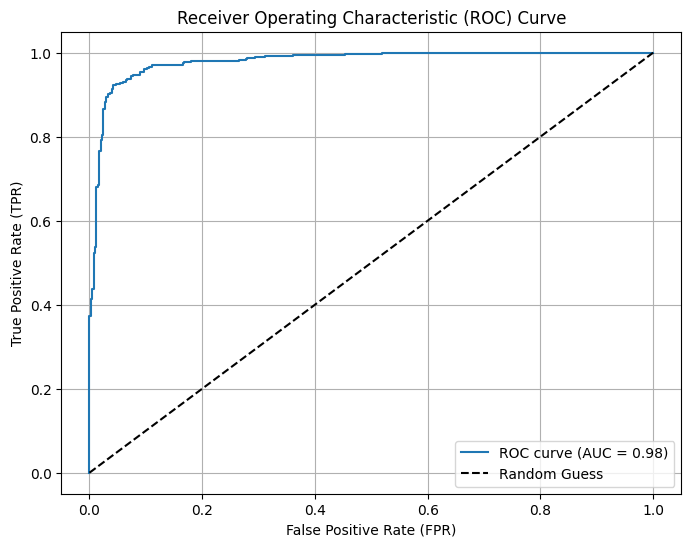

In [157]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = model_new.predict_proba(xr_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(yr_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(yr_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

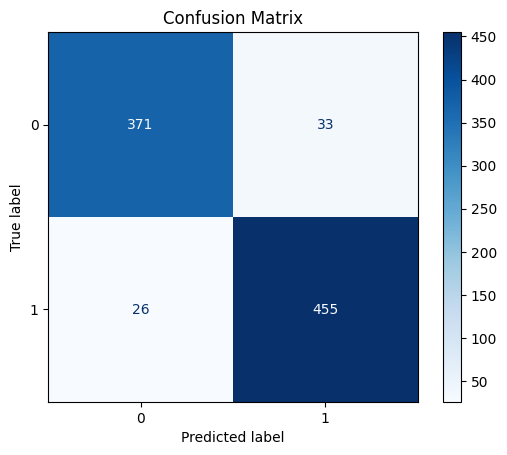

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted class labels
y_pred = model_new.predict(xr_test)

# Compute the confusion matrix
cm = confusion_matrix(yr_test, y_pred, labels=model_new.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_new.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


**True Negatives (TN)**: The model correctly predicted 366 instances where the customer did not churn (Churn_No).

**False Positives (FP)**: The model incorrectly predicted 43 instances as Churn_Yes (positive), but in reality, those customers did not churn (Churn_No).

**False Negatives (FN)**: The model incorrectly predicted 18 instances as Churn_No (negative), but in reality, those customers did churn (Churn_Yes).

**True Positives (TP)**: The model correctly predicted 461 instances where the customer did churn (Churn_Yes).

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
clf_gini = DecisionTreeClassifier(random_state=42, criterion ='entropy', max_leaf_nodes=95, max_features=0.5)

# Fitting the model on the training data
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=0.5, max_leaf_nodes=95,
                       random_state=42)

In [160]:
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
# Import the metrics module from sklearn
from sklearn import metrics

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 150,max_depth=6, min_samples_leaf=8)

model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9213483146067416
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       389
           1       0.92      0.95      0.93       501

    accuracy                           0.92       890
   macro avg       0.92      0.92      0.92       890
weighted avg       0.92      0.92      0.92       890



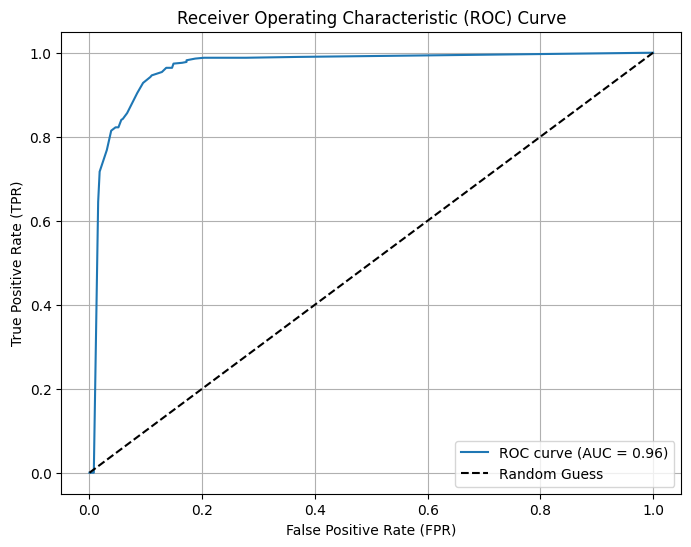

In [161]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = model_dt_smote.predict_proba(xr_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(yr_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(yr_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

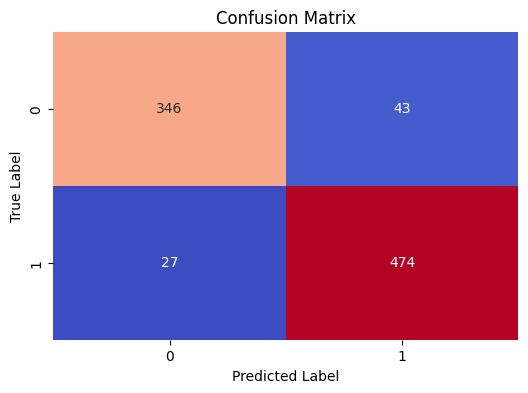

In [162]:
y_pred = model_dt_smote.predict(xr_test)

# Compute the confusion matrix
cm = confusion_matrix(yr_test, y_pred, labels=model_new.classes_)

# Create a custom color palette using seaborn
custom_palette = sns.color_palette("coolwarm", as_cmap=True)  # Choose any palette you like

# Plot the confusion matrix with the custom color map
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_palette, cbar=False,
            xticklabels=model_new.classes_, yticklabels=model_new.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**True Negatives (TN)** : The model correctly predicted 371 times that the customer would not churn (stay with the service), and the customer indeed did not churn.

**False Positives (FP)**:The model incorrectly predicted 37 times that the customer would churn (leave the service), but the customer actually did not churn.

**False Negatives (FN)**:The model incorrectly predicted 39 times that the customer would not churn, but the customer actually churned.

**True Positives (TP)**: The model correctly predicted 444 times that the customer would churn, and the customer indeed churned.

In [163]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.8 MB/s eta 0:00:00


In [164]:
from catboost import CatBoostClassifier

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=CatBoostClassifier(random_state=42, verbose=0, max_depth=5)

model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9557321225879682
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       394
           1       0.96      0.97      0.96       487

    accuracy                           0.96       881
   macro avg       0.96      0.95      0.96       881
weighted avg       0.96      0.96      0.96       881



In [165]:
model_dt_smote.score(xr_train, yr_train)

0.988923601249645

In [166]:
model_dt_smote.score(xr_test, yr_test)

0.9557321225879682

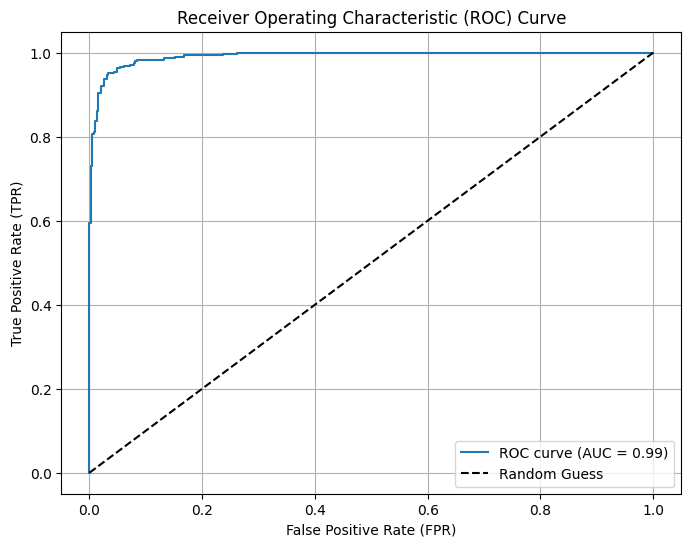

In [167]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = model_dt_smote.predict_proba(xr_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(yr_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(yr_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

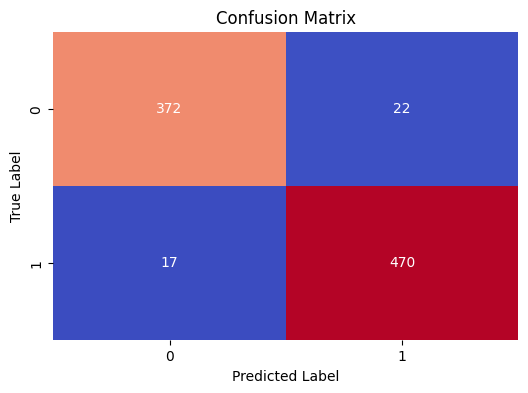

In [168]:
y_pred = model_dt_smote.predict(xr_test)

# Compute the confusion matrix
cm = confusion_matrix(yr_test, y_pred, labels=model_new.classes_)

# Create a custom color palette using seaborn
custom_palette = sns.color_palette("coolwarm", as_cmap=True)  # Choose any palette you like

# Plot the confusion matrix with the custom color map
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_palette, cbar=False,
            xticklabels=model_new.classes_, yticklabels=model_new.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**True Negatives (TN)** : The model correctly predicted 391 times that the customer would not churn (stay with the service), and the customer indeed did not churn.

**False Positives (FP)** : The model incorrectly predicted 14 times that the customer would churn (leave the service), but the customer actually did not churn.

**False Negatives (FN)** : The model incorrectly predicted 18 times that the customer would not churn, but the customer actually churned.

**True Positives (TP)** :The model correctly predicted 466 times that the customer would churn, and the customer indeed churned.

#Looking at all the models, we found that CatBoost Classifier gives the best result